# Описание проекта
--------------------------------------------------------

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — **отследить влияние условий жизни учащихся** в возрасте от 15 до 22 лет **на их успеваемость по математике**, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. (*то есть тех, кто вероятнее данный тест провалит*)

Для этого **нужно построить модель, которая предсказывала бы результаты госэкзамена по математике** для каждого ученика школы.

## 09.06.2020 (d/m/y)

## Описание данных
---------------

* 1 school — аббревиатура школы, в которой учится ученик

* 2 sex — пол ученика ('F' - женский, 'M' - мужской)

* 3 age — возраст ученика (от 15 до 22)

* 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

* 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

* 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

* 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

* 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

* 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

* 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

* 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

* 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

* 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

* 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

* 15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

* 16 schoolsup — дополнительная образовательная поддержка (yes или no)

* 17 famsup — семейная образовательная поддержка (yes или no)

* 18 paid — дополнительные платные занятия по математике (yes или no)

* 19 activities — дополнительные внеучебные занятия (yes или no)

* 20 nursery — посещал детский сад (yes или no)

* 21 higher — хочет получить высшее образование (yes или no)

* 22 internet — наличие интернета дома (yes или no)

* 23 romantic — в романтических отношениях (yes или no)

* 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

* 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

* 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

* 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

* 28 absences — количество пропущенных занятий

* 29 score — баллы по госэкзамену по математике

##  Содержание (План Работы)
------------
### Этап 1 
* Открыть предоставленный датасет и изучить общую информацию
* Провести предобработку данных, основанную на выводах изучения датасета. 
-------------
### Этап 2
*-Раздел 1-*
* Рассмотреть распределение признака для числовых переменных
* Устранить выбросы.
* По необходимости преобразовать данные
-----
*-Раздел 2-*
* Оценить количество уникальных значений для номинативных переменных.
* Устранить выбросы.
* По необходимости преобразовать данные
-------------
*-Раздел 3-*
* Провести корреляционный анализ количественных переменных
* Отобрать коррелирующие переменные.
* Проанализировать номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в данном случае — на переменную score).
-------------
### Этап 3 
* Сформулировать выводы относительно качества данных и тех переменных, которые будут использовать в дальнейшем построении модели.


-------------

# Этап 1
------
## *Открытие предоставленного датасета и изучение общей информации*
------
*На данном этапе необходимо:*

1) Импортировать  рабочий датасет и библиотеки, инструменты которых в дальнейшем придется использовать для работы с данными

2) Открыть датасет и рассмотреть его. Указать на общие проблемы и предпринять попытку их устранения

3) Описать выводы и результаты


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind,norm,t
from itertools import combinations

# Для дальнейшего удобства предлагаю установить дополнительные параметры отображения датафрейма

pd.set_option('display.max_rows',50) # данный код делает возможным отображение до 50 строк датафрейма за один вызов
pd.set_option('display.max_columns',50) # данный код делает возможным отображение до 50 колонок датафрейма за один вызов

In [2]:
dataframe = pd.read_csv('C:\Data for Python\stud_math.xls')

In [3]:
dataframe.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Названия колонок в целом составлены верно, однако ради более строгого формата следует привести названия следующих колонок к нижнему регистру с андерскором ( нижним подчеркиванием):
____
Pstatus  --->  p_status

Medu  --->  m_edu

Feud --->   f_edu

Mjob --->   m_job

Fjob --->  f_job

goout ---> go_out

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Имеется ли у датафрейма дубликаты? (повторяющиеся наблюдения)

In [5]:
dataframe.duplicated().sum()

0

## Вывод
-------------

В датафрейме отсутствуют дубликаты строк.

В 27 из 30 столбцов имеются пропуски. При первоначальном рассмотрении, в среднем, их число не превышает 10% от общего количества значений рассматриваемого признака и не является критическим для дальнейшего анализа. Из имеющихся признаков полностью известны лишь школа, пол и возраст студента.

Каждое из 394 наблюдений обладает 17 категориальными и 13 числовыми признаками ( характеристиками )

Прежде, чем обрабатывать или работать с предоставленным датасетом имеет смысл создать его копию, чтобы иметь возможность обращения к его первоначальному виду и минимизировать искажение первоначальных данных при дальнейшей работе. 
Некоторые названия колонок следует привести к более строгому виду.




-----
## *Проведение предобработки данных*
-----
*На данном этапе необходимо:*

1) Создать копию датафрейма

2) Исправить название колонок

3) Заменить пропуски

4) Описать выводы и результаты

In [6]:
df = dataframe.copy()

In [7]:
df.rename(columns={'Pstatus':'p_status','Medu':'m_edu','Fedu':'f_edu',
                  'Mjob':'m_job','Fjob':'f_job','goout':'go_out'}, inplace=True)

In [8]:
nan_df = pd.DataFrame(df.isna().sum(),columns=['NaN'])
nan_df

,NaN
school,0
sex,0
age,0
address,17
famsize,27
p_status,45
m_edu,3
f_edu,24
m_job,19
f_job,36


In [9]:
# Среднее количество пропусков
round(nan_df.median()/395,2)

NaN    0.04
dtype: float64

Конечно, возможно просто выбросить наблюдения из датафрейма, в которых содержится NaN, так как их совсем немного и на результат исследования данная чистка вряд ли значительно повлияет, однако лучше будет предпринять попытку замены NaN на None для дальнейшего удобства. Это позволит перевести тип пустых значений в нейтральное состояние, из типа float в тип NoneType. 
(Распределение NaN в датафрейме является таковым, что если удалить все строки с пустыми значениями, то потеряется большая часть информации (код для проверки закомментирован ниже) из 394 наблюдений остается лишь 89)

In [10]:
#df.dropna()

In [11]:
df = df.where(df.notnull(),None)

Так как метод where перевел некоторые числовые признаки в тип object из-за того, что в признаки попал тип None, следует вернуть некоторым столбцам их числовой, первоначальный вид

In [12]:
df[['m_edu','f_edu','traveltime','studytime','failures','studytime, granular','famrel','freetime',
   'go_out','health','absences','score']] = df[['m_edu','f_edu','traveltime','studytime','failures','studytime, granular','famrel','freetime',
   'go_out','health','absences','score']].apply(pd.to_numeric)
#df.info()

Следует обратить внимание на 1 признак

'studytime, granular'

Он как-то связан со временем обучения, однако изначально никакого описания данной характеристики не приводится. 
Можно попробовать установить чем данный признак отличается от параметра времени обучения. 

In [13]:
dataframe.loc[:,['studytime','studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [14]:
(dataframe['studytime'] / dataframe['studytime, granular']).unique()

array([-0.33333333,         nan])

In [15]:
dataframe['studytime']

0      2.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
390    2.0
391    1.0
392    1.0
393    1.0
394    1.0
Name: studytime, Length: 395, dtype: float64

У данных двух признаков прослеживается 100% отрицательная взаимосвязь ( корреляция)
Что из себя представляет признак 'studyitme, granular' остается под вопросом.
Видно, что каждое значение из 'studytime' отличается от 'studytime, granular' на -0.(3). Что из себя представляет данная характеристика не очень ясно.

Что можно предположить?

Отрицательный признак потраченного времени на учебу вне школы это количество потерянных часов, которое ученик тратил во время внеклассных занятий от общего количества внеклассного учебного времени. Однако это странно, так как вряд ли у 400 человек совпадает количество полезного времени в точности до n знака после запятой, 0.3 в периоде. 

Поскольку информация по признаку 'studyitme, granular' не предоставлена, а также, возможно является излишней, так как по условию'studytime' отражает количество затраченного времени на учебу помимо школы, данный признак ( 'studyitme, granular' ) в дальнейшей работе рассматриваться не будет.

In [16]:
# Исключение признака studytime, granular из датафрейма
df = df.drop(['studytime, granular'], axis=1)

## Вывод
----------
Данные поступили в приемлимом виде.
 
Дубликаты отсутсвуют, имеющийся датасет имел мало недостатков для того, чтобы делать значительную предобработку. NaN заменены на значения None.

Восстановление пропущенных значений, на основе имеющихся, не представляется возможным или даже целесообразным, так как само количество пропусков в каждом из столбцов не расценивается как критичное для дальнейшего анализа данных. 

В среднем, пустых значений в каждом признаке не более 4-7 %.

Наибольшее количество пропусков имеется в следующих признаках:
* *оплата дополнительных занятий (paid)* - 12%
* *семейная образовательная поддержке (famsup)* - 11%
* *совместное проживание родителей (Pstatus)* - 13%

Количество вышеуказанных пропусков хоть дажи и превышает 10%, однако в выборке в 350 человек вряд ли играет ключевое значение. Устранение пропусков в данном случае неразумно, так как потеряется большое количество других признаков. Замена попусков также не имеет смысла, так как каждый из значений признаков представляет из себя не количественные природу данных ( например измерение температуры в регионе, где можно было бы заполнить эти данные средним значением), а ответ на вопрос Да/Нет. Восстановление значений тоже не представляется оправданным. Хоть и все предыдущие предложения возможны, для их корректного восстановления требуется обращаться к источнику информации.

В датафрейме имелся неописанный в условии признак 'studytime, graular' , который в дальнейшем был проанализирован и удален, так как его наличие является лишним, а природа неизвестна. 

На данный момент датасет готов к исследованию.

In [17]:
# Для наглядности можно разделить датафрейм по двум признакам

df_num = pd.DataFrame(df[['age','m_edu','f_edu','traveltime','studytime','failures','famrel','freetime',
   'go_out','health','absences','score']])

# df_num - датафрейм количественых признаков ( num - number)

df_nom = pd.DataFrame(df[['school','sex','address','famsize','p_status','m_job','f_job','reason',
                      'guardian','schoolsup','famsup','paid',
                      'activities','nursery','higher','internet','romantic','score']])

# df_nom - датафрейм с номинативными признаками ( nom - nominative)
# Так как основной покзататель, с которым определяется связь является score, то следует включить его в номинативный датасет

## *Функции для дальнейшей работы*

In [18]:
def get_grouped_values(data, names, figsize=(16, 7), bar_width=0.15,
                       annotation=True, edgecolor='w', xcoord=5, ycoord=0, annotation_fontsize=10, bbox_color='white',
                       unique_values=True, value_y=False, perc=False,
                       color_list=False,
                       label_xticks=False, rotation=0,
                       title='', title_fontsize=15, facecolor='w',
                       xlabel='', xlabel_size=12, ylabel='', ylabel_size=12,
                       tick_size_x=10, tick_size_y=10,
                       y_limit=False,
                       ymin=0, ymax=0,
                       legend=False, legend_labels=False):

    # Для корректной работы для данной функции необходимо импортировать три билиотеки
    # pandas , numpy , matplotlib
    """ What it does?
        Input - dataframe and the list of the column name(s) which values you want to count
        Output - graph with value counted blocks of each column

       data - Dataframe
       names - list of column names
       figsize - size of a figure
       bar_width - width of a bars
       annotation - shows the values of each bar on the graph
       edgecolor - color of the bar edges
       xcoord - fixes x coordinates along the figure for the labels
       ycoord - fixes y coordinates along the figure for the labels
       annotation_fontsize - color of a annotation's font
       bbox_color - color of a box
       unique_values - default (True). Shows the unique values of the groups in annotation to the each bar
       value_y - default (False). Show the values in numerical form 
       perc - default (True). Shows the values in a percentage form
       color_list - default(False), input the list of colors for each bar
       label_xticks - input list of values for the name of each group
       rotation - rotation of x ticks
       title - name of figure
       title_fontsize - size of the main title name
       facecolor - color of a graph's font
       xlabel - label of x axis
       xlabel_size - size of a x label
       tick_size_x - size of x ticks
       ylabel - label of y axis
       ylabel_size - size of a y label
       tick_size_y - size of y ticks
       y_limit - default (False). Option to set limit of y axis
       ymin - default 0
       ymax - default - 0
       legend - legend display option (default False)
       legend_labels - input list of labels for legend (default False)
       """

    # шаг 1. Создание списка в который последовательно добавляются количество уникальных значений признака
    total_values = []
    for name in names:
        grouped = data[name].value_counts().sort_values().reset_index()
        for number in range(0, len(grouped)):
            total_values.append(grouped[name][number])

    # шаг 2. Разбиение предыдущего списка на блоки равные количеству уникальных значений в признаке
    unique_groups = []
    for name in names:
        unique_groups.append(
            list(data[name].value_counts().sort_values().values))

    # шаг 3. Заполнение каждой отмеченной на предыдущем шаге группы в листе нулями до длины максимальной группы
    max_length = max([len(x) for x in unique_groups])
    null_filled = [x+[0]*(max_length-len(x)) for x in unique_groups]

    # шаг 4. Транспонирование значений для дальнейшего отображения
    super_list = []
    for values in zip(*null_filled):
        super_list.append(values)

    # шаг 5. Определение длины каждой группы в новом списке super_list и перевод в тип значения list
    # (достаточно взять 0 элемент, так как отныне по длине они все равны)
    reference_measure = np.arange(len(super_list[0]))
    list_rm = list(reference_measure)

    # шаг 6. Создание списка с координатами х для дальнейшего графика
    count = 0
    while count < len(super_list):
        count += 1
        list_rm += list(reference_measure + bar_width*count)
        if count == len(super_list):
            break

    # шаг 7. Группировка х координаты для соответсвующих у значений
    x_coordinates = np.array_split(np.array(list_rm), len(super_list)+1)[:-1]

    # Создание материала для легенды
    # шаг 1. Создание списка в который последовательно добавляются названия признаков количества уникальных значений
    total_index = []
    for name in names:
        grouped = data[name].value_counts().sort_values().reset_index()
        for number in range(0, len(grouped)):
            total_index.append(grouped['index'][number])

    # шаг 2.  Разбиение предыдущего списка на блоки равные количеству уникальных значений в группе
    index_groups = []
    for name in names:
        index_groups.append(
            list(data[name].value_counts().sort_values().index))

    # шаг 3. Заполнение каждой отмеченной на предыдущем шаге группы в листе символом / до длины максимальной группы
    max_length = max([len(x) for x in index_groups])
    space_filled = [x+[None]*(max_length-len(x)) for x in index_groups]

    # шаг 4. Транспонирование значений для дальнейшего отображения
    super_index = []
    for values in zip(*space_filled):
        super_index.append(values)
        
        
    # шаг 5. Задание значений в необходимом порядке с исключением лишних элементов
    pre_result_index = [item for x in super_index for item in x]
    index_result = []
    for element in pre_result_index:
        if element is not None:
            index_result.append(element)
    iter_list = iter(index_result)
    

    # ПОСТРОЕНИЕ ГРАФИКА

    # Создание фигуры
    fig, ax = plt.subplots(figsize=figsize)
    barWidth = bar_width

      
    
    # Вывод значений с автоматическим закрашиванием баров
    if color_list == False:
        for i in range(0, len(super_list)):
            bars = ax.bar(x_coordinates[i], super_list[i],
                      width=barWidth, label=str(i+1), edgecolor='w')
            
            sum_block = [sum(unique_groups[i]) for i in range(0, len(unique_groups))]
            
            # Аннотация + уникальные значения
            if annotation is not False and unique_values is not False and value_y is False and perc is False:
                for bar in bars:
                    if bar.get_height() != 0:
                        plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                             '{}'.format(str(next(iter_list))),
                             fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
            
            # Аннотация + уникальные значения + количество значений в процентном виде (1 способ задания этой комбинации)
            elif annotation is not False and unique_values is not False and value_y is not False and perc is not False:
                for number, bar in enumerate(bars):
                    if bar.get_height() != 0:
                        plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                              '{}%{}{}'.format(round((bar.get_height()/sum_block[number])*100), '\n', str(next(iter_list))),
                             fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
            
            # Аннотация + уникальные значения + количество значений в процентном виде (2 способ задания этой комбинации)
            elif annotation is not False and unique_values is not False and value_y is False and perc is not False:
                for number, bar in enumerate(bars):
                    if bar.get_height() != 0:
                        plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                              '{}%{}{}'.format(round((bar.get_height()/sum_block[number])*100), '\n', str(next(iter_list))),
                             fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
            
            
            # Аннотация + уникальные значения + количество значений
            elif annotation is not False and unique_values is not False and value_y is not False and perc is False:
                for bar in bars:
                    if bar.get_height() != 0:
                        plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                              '{}{}{}'.format(bar.get_height(), '\n', str(next(iter_list))),
                             fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                                                
            # Аннотация + количество значений в процентном виде (1 способ задания этой комбинации)                    
            elif annotation is not False and unique_values is False and value_y is not False and perc is not False: 
                for number, bar in enumerate(bars):
                    if bar.get_height() != 0:
                        plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                              '{}%'.format(round((bar.get_height()/sum_block[number])*100)),
                             fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))             
            
            # Аннотация + количество значений в процентном виде (2 способ задания этой комбинации)
            elif annotation is not False and unique_values is False and value_y is False and perc is not False:
                for number, bar in enumerate(bars):
                    if bar.get_height() != 0:
                        plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                              '{}%'.format(round((bar.get_height()/sum_block[number])*100)),
                             fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                        
            # Аннотация + количество значений           
            elif annotation is not False and unique_values is False and value_y is not False and perc is False:
                for bar in bars:
                    if bar.get_height() != 0:
                        plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                              bar.get_height(),
                             fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                        
            # Отключение аннотации
            else:
                None

    # Вывод значений с возможностью задать желаемые цвета каждому бару поочередно
    else:
        try:
            for i in range(0, len(super_list)):
                bars = ax.bar(x_coordinates[i], super_list[i],
                              width=barWidth, color=color_list[i], label=str(i+1), edgecolor='w')

                sum_block = [sum(unique_groups[i]) for i in range(0, len(unique_groups))]
                
                # Аннотация + уникальные значения
                if annotation is not False and unique_values is not False and value_y is False and perc is False:
                    for bar in bars:
                        if bar.get_height() != 0:
                            plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                                 '{}'.format(str(next(iter_list))),
                                 fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                            
                # Аннотация + уникальные значения + количество значений в процентном виде
                elif annotation is not False and unique_values is not False and value_y is not False and perc is not False:
                    for number, bar in enumerate(bars):
                        if bar.get_height() != 0:
                            plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                                  '{}%{}{}'.format(round((bar.get_height()/sum_block[number])*100), '\n', str(next(iter_list))),
                                 fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                            
                # Аннотация + уникальные значения + количество значений в процентном виде (2 способ задания этой комбинации)
                elif annotation is not False and unique_values is not False and value_y is False and perc is not False:
                    for number, bar in enumerate(bars):
                        if bar.get_height() != 0:
                            plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                                  '{}%{}{}'.format(round((bar.get_height()/sum_block[number])*100), '\n', str(next(iter_list))),
                                 fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                            
                # Аннотация + уникальные значения + количество значений 
                elif annotation is not False and unique_values is not False and value_y is not False and perc is False:
                    for bar in bars:
                        if bar.get_height() != 0:
                            plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                                  '{}{}{}'.format(bar.get_height(), '\n', str(next(iter_list))),
                                 fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                                     
                                     
                # Аннотация + количество значений в процентном виде (1 способ задания этой комбинации)                    
                elif annotation is not False and unique_values is False and value_y is not False and perc is not False: 
                    for number, bar in enumerate(bars):
                        if bar.get_height() != 0:
                            plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                                  '{}%'.format(round((bar.get_height()/sum_block[number])*100)),
                                 fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))                
                                     
                                     
                                     
                # Аннотация + количество значений в процентном виде (2 способ задания этой комбинации)
                elif annotation is not False and unique_values is False and value_y is False and perc is not False:
                    for number, bar in enumerate(bars):
                        if bar.get_height() != 0:
                            plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                                  '{}%'.format(round((bar.get_height()/sum_block[number])*100)),
                                 fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                
                # Аннотация + количество значений в процентном виде (3 способ задания этой комбинации)
                elif annotation is not False and unique_values is not False and value_y is False and perc is not False:
                    for number, bar in enumerate(bars):
                        if bar.get_height() != 0:
                            plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                                  '{}%'.format(round((bar.get_height()/sum_block[number])*100)),
                                 fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
    
                 # Аннотация + количество значений
                elif annotation is not False and unique_values is False and value_y  is not False and perc is False:
                    for bar in bars:
                        if bar.get_height() != 0:
                            plt.text(bar.get_x() + bar.get_width()/xcoord, bar.get_y() + bar.get_height() + ycoord,
                                  bar.get_height(),
                                 fontsize=annotation_fontsize, bbox=dict(facecolor=bbox_color))
                
                # Отключение аннотации
                else:
                    None


        except IndexError:
             print('Для корректной работы функции Вам необходимо дополнить список color_list еще',
                   len(super_list) - len(color_list), 'цветом(ами).', '\n',
                   'Вы можете выбрать цвета в данном каталоге: https://matplotlib.org/3.1.0/gallery/color/named_colors.html'
                  '\n', 'For the function to work correctly, You should add',
                   len(super_list) - \
                       len(color_list), 'more value(s) in color_list.', '\n',
                   'You can choose colors in the following catalog:',
                   'https://matplotlib.org/3.1.0/gallery/color/named_colors.html')





    if label_xticks == False:
        plt.xticks([x + barWidth for x in range(len(bars))], rotation=rotation)
    else:
        plt.xticks([x + barWidth for x in range(len(bars))], label_xticks, rotation=rotation)



    # Дополнительные параметры графика
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_facecolor(facecolor)
    ax.set_xlabel(xlabel, fontsize=xlabel_size)
    ax.set_ylabel(ylabel, fontsize=ylabel_size)
    ax.tick_params(axis="x", labelsize=tick_size_x)
    ax.tick_params(axis="y", labelsize=tick_size_y)
   
    
    if y_limit is not False:
        ax.set_ylim([ymin,ymax])


    # Возможность вывода легенды на график
    if legend is not False and legend_labels is False:
        ax.legend(super_index)
    elif legend is not False and legend_labels is not False:
        ax.legend(legend_labels)
    else:
        None

In [19]:
def valueprinter(bars, space_between_x=1, xcoord=2.3, ycoord=2, fontsize=14, bbox_color='white', fixed=True, perc=True): 
    
    """Takes a barplot and prints values of each bar.
    It haves parameters, such as:
    
    -bars = containter of a bar plot 
    -xcorrd = fixes x coordinates along the figure for the labels
    -ycoord = fixes y coordinates along the figure for the labels
    -fontsize = color of a font
    -bbox_color = color of a box
    -xfixed = default (True). If you have more than just 1 graph it will help you to put the specific coordinates of x
    -perc = default (True) .Shows the values in a percentage form
    -space_between_x = value,which can help with xcoord fixation when use subplots"""
    
# В дальнейшем, функция позволит выводить значения каждой колонки (бара) на график, где (стиль - barplot) 
# Устанавливаемые значения ориентируются на ось Y, то есть на высоту. 
    
# Если используется 1 график, то дополнительные настройки координат не потребуются.
# Однако, если используется функция subpots. 
# Придется использовать дополнительный аргумент fixed для ручной настройки значений координат как по оси Х , так и по оси Y.
    
    
    # Общая сумма всех Y-значений - баров на графике. В дальнейшем это число понадобится для того, чтобы появилась возможность 
    # отображения значений в процентном выражении
    total_sum = 0
    for number in range(0,len(bars)):
        total_sum += bars[number].get_height() 
    
    
    # Основной код. Без subplots
    if fixed==True and perc==True:
        for elem in bars:
            plt.text(elem.get_x() + elem.get_width()/xcoord, elem.get_y() + elem.get_height() + ycoord,
                     '{}%'.format(round((elem.get_height()/total_sum)*100)),
                    fontsize=fontsize, bbox=dict(facecolor=bbox_color))
            
            
# Если вы решаете использовать Subplots, то изменив параметр fixed на НЕ True, вы сможете переносить значения 
# в любое место общего графика вручную. Без данной, специально прописанной возможности, subplots и данная функция  
# работали бы некорректно. 
    
# Если, вы используете subplots, то для каждого подграфика, придется использовать следующие аргументы
#  fixed=False
#  space_between_x=...   
#  xcoord=...
#  ycoord=...     
# Именно в таком порядке. 
    
    
    # Используя subplots
    elif fixed!=True and perc==True: 
        for elem in bars: # это дает возможность более быстрого, точного обозначения
            plt.text(elem.get_x()*space_between_x + xcoord, elem.get_y() + elem.get_height() + ycoord,
                     '{}%'.format(round((elem.get_height()/total_sum)*100)),
                    fontsize=fontsize, bbox=dict(facecolor=bbox_color))
            
    # Дальше код повторяет свой функционал с выводом значений, однако появляется возможность их вывода не в процентном,
    # а абсолютном выражении засчет изменения параметра perc(сокр. Англ. percentage) в отличное от True значение
    
    # Без subplots 
    elif fixed==True and perc!=True: 
        for elem in bars:
            plt.text(elem.get_x() + elem.get_width()/xcoord, elem.get_y()+elem.get_height() + ycoord,
                     elem.get_height(),
                    fontsize=fontsize, bbox=dict(facecolor=bbox_color))
            
    # Используя subplots      
    else:
        for elem in bars: 
            plt.text(elem.get_x()*space_between_x + elem.get_width() + xcoord, 
                     elem.get_y() + elem.get_height() + ycoord, elem.get_height(),
                    fontsize=fontsize, bbox=dict(facecolor=bbox_color)) 
            
# Для того, чтобы воспользоваться корректно данной функцией, необходимо присвоить осям некоторую переменную и применить 
# ее в функции, в качестве аргумента. Данная функция работает с классом BarContainer
# Объектом, содержазим в себе все значения и характеристики каждого бара на графике.
# https://matplotlib.org/3.2.1/api/container_api.html

Пример работы функции valueprinter и функции subplots находится ниже

In [20]:
#fig, ax = plt.subplots(2,2, figsize=(17,15))

#bars_0 = ax[0][0].bar(df['age'].value_counts().index, df['age'].value_counts())

#bars_1 = ax[1][1].bar(df['m_edu'].value_counts().index, df['m_edu'].value_counts())

#valueprinter(bars_0, fixed=False, space_between_x=1.2, xcoord=-24, ycoord=177, k=1.2) # значения подбираются экспериментально

In [21]:
def get_vc_dataframe(column_names,unique = False): 
    
    """It takes list with names of columns, counts values of a column and concatanate them to the one DataFrame.
    It needs two values,
    - column_names =  list, 
    - unique = default False. Shows number of unique values additionally'"""
    
# Cоздает датафрейм в котором индексом будет название признака, а
# значениями будет результат функции value_counts
    
    df_list = []
    df_dict = {}
    
    if unique == False:
        for name in column_names:
            df = pd.DataFrame(df_nom[name].value_counts())
            df = df.reset_index()
            df.columns = ['parameter','total']
            df_dict[name] = df
            result = pd.concat(df_dict)
            print('Количество пустых значений в',name,': {}'.format(df_nom[name].isna().sum()))  
        return result
    
    else:
        for name in column_names:
            df = pd.DataFrame(df_nom[name].value_counts())
            df = df.reset_index()
            df.columns = ['parameter','total']
            df_dict[name] = df
            result = pd.concat(df_dict)
            print('Количество пустых / уникальных значений в',name,': {} / {}'.format(df_nom[name].isna().sum(),
                                                                                      df_nom[name].nunique()))
        return result

In [22]:
def get_boxplot(column):
    """Constructs boxplot"""
    
# Строит BoxPlot признака по отношению к оценкам

    fig,ax = plt.subplots(figsize=(8,8))
    sns.boxplot(x=df_nom[column],y=df_nom['score'],data=df_nom, ax=ax,width=0.2)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('score',fontsize=20)
    plt.xticks(rotation=45,fontsize=15)
    plt.show()

In [23]:
def get_stat_dif(column):
    
    """Сheckfunction of the statistical diversity for values of a column-attribute"""
    
#функция проверки статистических различий для значений признака

    # Рассматривается основная группа значений в распределении признака (установленно 5, можно менять по усмотрению)
    cols = df.loc[:, column].value_counts().index[:5]
    
    # Создается пары сочетаний каждого значения друг с другом без повторений 
    combinations_all = list(combinations(cols, 2))
    
    # Рассматривается статистическая связь между каждыми двумя признаками, то значениями в каждой паре
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                     df.loc[df.loc[:, column] == comb[1], 'score'],
                    nan_policy='omit').pvalue\
            <= 0.05/len(combinations_all): # Поправка Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break 
    

In [24]:
def get_plot(column_name, x_tick_labels='', bar_width=0.35, title='', xlabel='', ylabel='', dropna=False,
             xlabel_size=21, ylabel_size=21, color_list = False,
             title_fontsize=25, tick_size=22, grid=False, rotation=0, 
             facecolor='w', color_bar='darkblue' , edgecolor='w', 
             xcoord=2.8, ycoord=2, annotation_fontsize=16, bbox_color='white', annotation=True, perc=True):
    
    """Displays graph in specific style for only one column name of a dataframe:
    
    - column_name = column name
    - x_tick_labels = '' (labels of ticks)
    - bar_width = width of a bars
    - title = title name of graph
    - xlabel = label of x axis
    - ylabel = label of y axis
    - dropna = (False default) it drops nan vaues of colun before displaying it
    - xlabel_size = size of x label
    - ylabel_size = size of y label
    - color_list = insert list of colors for each bar, otherwise each bar will be colored in "darkblue"
    - title_fontsize = size of a main title
    - tick_size = size of tickers
    - grid = (False default) grid option to display
    - rotation = labels of ticks rotation
    - facecolor = font color of a graph 
    - color_bar = color for every bar
    - edgecolor = color of the edges among the bars
    - The next parameters coincide with the function VALUEPRINTER
    - xcoord = fixes x coordinates along the figure for the labels
    - ycoord = fixes y coordinates along the figure for the labels
    - annotation_fontsize = color of a font
    - bbox_color = color of a box
    - annotation = shows the values of each bar on the graph
    - perc = default (True) .Shows the values in a percentage form"""
    
# Данная функция предназначена только для создания 1 графика с использованием баров. 
# На ось Y она выводит количество уникальных значений рассматриваемого признака
    
    
    # Построение графика
    fig, ax = plt.subplots(figsize=(25, 10))
    
    
    if dropna==False:
        bars = ax.bar(np.arange(0,len(df[column_name].value_counts())) , 
                      df[column_name].value_counts().reset_index().sort_values(by='index')[column_name].values, 
                  width=bar_width, color=color_bar, edgecolor=edgecolor)
    else:
        dataframe_dropped = df[column_name].dropna()
        bars = ax.bar(np.arange(0,len(dataframe_dropped[column_name].value_counts())) ,
                      df[column_name].value_counts().reset_index().sort_values(by='index')[column_name].values, 
                  width=bar_width, color=color_bar, edgecolor=edgecolor)
    
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_facecolor(facecolor)
    ax.tick_params(axis="x", labelsize=tick_size)
    ax.tick_params(axis="y", labelsize=tick_size)
    ax.set_xlabel(xlabel, fontsize=xlabel_size)
    ax.set_ylabel(ylabel, fontsize=ylabel_size)
    
    # Установка цвета для каждого бара
    if color_list!=False:
        for number, color in enumerate(color_list):
            bars[number].set_color(color)
            bars[number].set_edgecolor(edgecolor)  
    else:
        None

        
    if x_tick_labels=='':
        plt.xticks([x for x in range(0,len(df[column_name].value_counts().index))], rotation=rotation)
    else:
        plt.xticks([x for x in range(0,len(df[column_name].value_counts().index))], x_tick_labels, rotation=rotation)
    
    if grid==False:
        None
    else:
        plt.grid()
    
    
    # Вывод значений на каждый бар
    if annotation==True:
        total_sum = 0
        for number in range(0,len(bars)):
            total_sum += bars[number].get_height()    
    
        if perc==True:
            for elem in bars:
                plt.text(elem.get_x()+elem.get_width()/xcoord,elem.get_y()+elem.get_height()+ycoord,
                         '{}%'.format(round((elem.get_height()/total_sum)*100)),
                        fontsize=annotation_fontsize,bbox=dict(facecolor=bbox_color))
        else:
            for elem in bars:
                plt.text(elem.get_x()+elem.get_width()/xcoord,elem.get_y()+elem.get_height()+ycoord,
                         elem.get_height(),
                        fontsize=annotation_fontsize,bbox=dict(facecolor=bbox_color))
    else:
        None

# Этап 2
------
## *Исследование данных*
------

*Основная задача данной части исследования является в том, чтобы проанализировать и подготовить данные к дальнейшему поиску взаимосвязей между условием жизни учащихся и их успеваемости по математике*

## ***- РАЗДЕЛ 1 -***

### Задачи

* Рассмотреть распределение признака для числовых переменных
* Устранить выбросы
* По необходимости преобразовать данные

Как распределен возраст учащихся? 

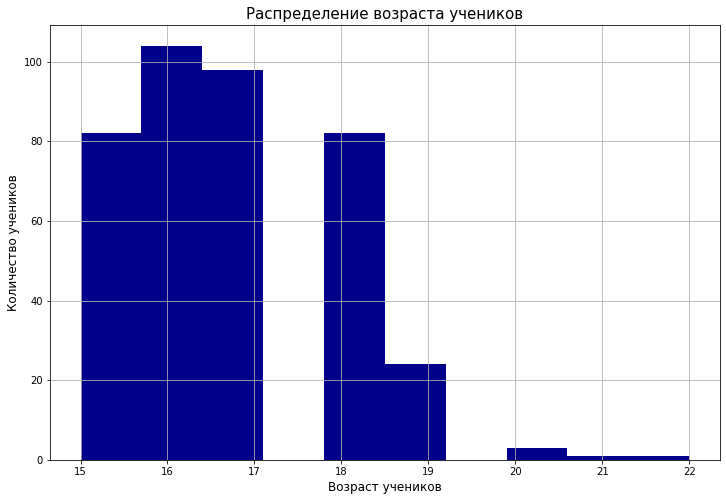

In [25]:
fig, ax = plt.subplots(figsize=(12,8))


ax.hist(df_num['age'], color='darkblue');
ax.set_title('Распределение возраста учеников', fontsize=15)
ax.set_xlabel('Возраст учеников', fontsize=12)
ax.set_ylabel('Количество учеников', fontsize=12)
plt.grid()

Показатель возраста распределен неравномерно.

В датафрейме присутствует 29 учеников чей возраст в контексте школьного обучения куда выше среднего. Почему школьного? Если заметить, то наибольшее количество наблюдений сконцентрировано вокруг 15-16-17 лет , что говорит о том, что данные собраны на учащихся старших классов школы, тем более по условию говорится, что рассматривается ученики школ. Конечно, это могла бы быть какая-то высшая школа, а при переводе на русский язык данный контекст был утрачен, однако данные подтверждают то, что речь идет не об институте или даже колледже, а именно о средней школе.

Предлагаю устранить из данных тех, кто старше 19 лет ( включительно) , концентрируя свои силы на целевой группе вместо того, чтобы стараться охватить всех возможных учеников. 
Полагаю, что вероятно для тех, кто по какой-либо угодно причине все еще учится в 19 лет ( или в еще большем возрасте) в школе, для успешной сдачи любого экзамена должен будет обладать схожими признаками с теми учениками, которым соответствует высокая вероятность успеха, то есть тех признаков, которые действительно способны повлиять на вероятность благоприятного результата. 
Известно, что сам возраст не имеет никакого значения для данной взаимосвязи.
Однако, на гораздо большей выборке ( в 10 тысяч или 100 тысяч наблюдений), даже с тем же процентным отношением целевой группы учащихся и 9% аномально взрослыми учениками, все-таки могли бы присутствовать некоторые закономерности, которые затрагивают показатели возраста ученика и оценки за экзамен, указывая на их косвенную взаимосвязь. Вероятно, это было бы связано с тем, что с течением времени человек приобретает больше опыта, навыков или каких-то дополнительных знаний, которые могут являться для него конкурентным преимуществом в учебе. 


В любом случае, поскольку известно, что сам возраст не имеет никакой важной роли для сдачи школьного экзамена, а количество текущих возрастных аномалий занимают очень незначительную часть общего набора, чуть менее 9%, для корректной работы и построения модели лучше избавить данные от таких учеников.

В дальнейшем, при статистическом анализе я еще рассмотрю подробнее этот вопрос, где будут присутствовать дополнительные аргументы, поддерживающие высказанную идею, а именно, почему лучше исключить на данном этапе чересчур взрослых школьников.



Перед исключением лишних данных интересно узнать какие оценки имеют ученики старше 19 лет ?

In [26]:
df[df['age'] >= 19]['score'].describe()

count    26.000000
mean     43.461538
std      24.850321
min       0.000000
25%      40.000000
50%      45.000000
75%      58.750000
max      90.000000
Name: score, dtype: float64

Видно, что данные ученики обладают в своей массе довольно средними показателями, серьезных аномалий в оценках не наблюдается.

In [27]:
df = df[df['age'] <= 18] # исключение аномальных учеников

Как теперь выглядит распределение возраста среди оставшейся целевой группы?

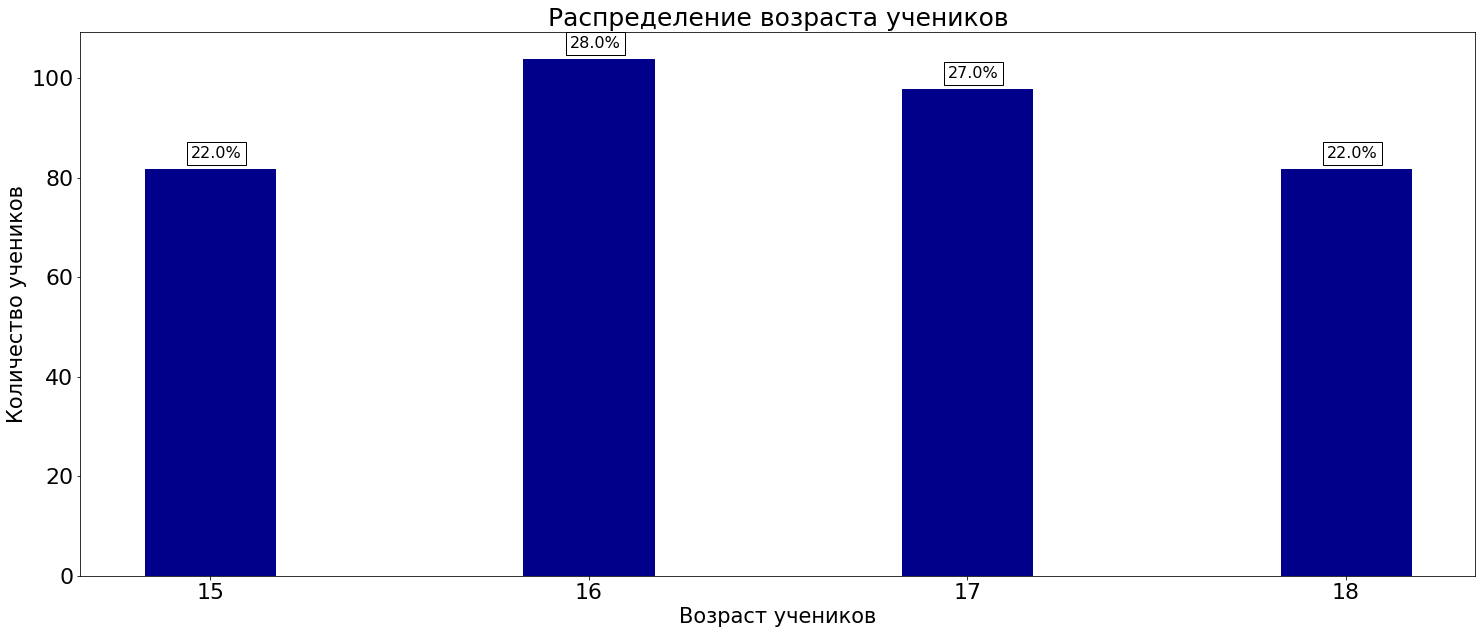

In [28]:
get_plot('age', x_tick_labels=['15','16','17','18'], 
         xlabel='Возраст учеников', ylabel='Количество учеников',
        title='Распределение возраста учеников')

Видно, что теперь количество студентов в каждой возрастной группе достаточно хорошо распределены и отсутствуют какие-либо аномальные значения, если и имеется связь между возрастом и оценками, то в дальнейшем, на таких равномерно распределенных данных вероятно должна будет проявиться значимая статистическая взаимосвязь.

______________
Как распределен пол среди учащихся? 

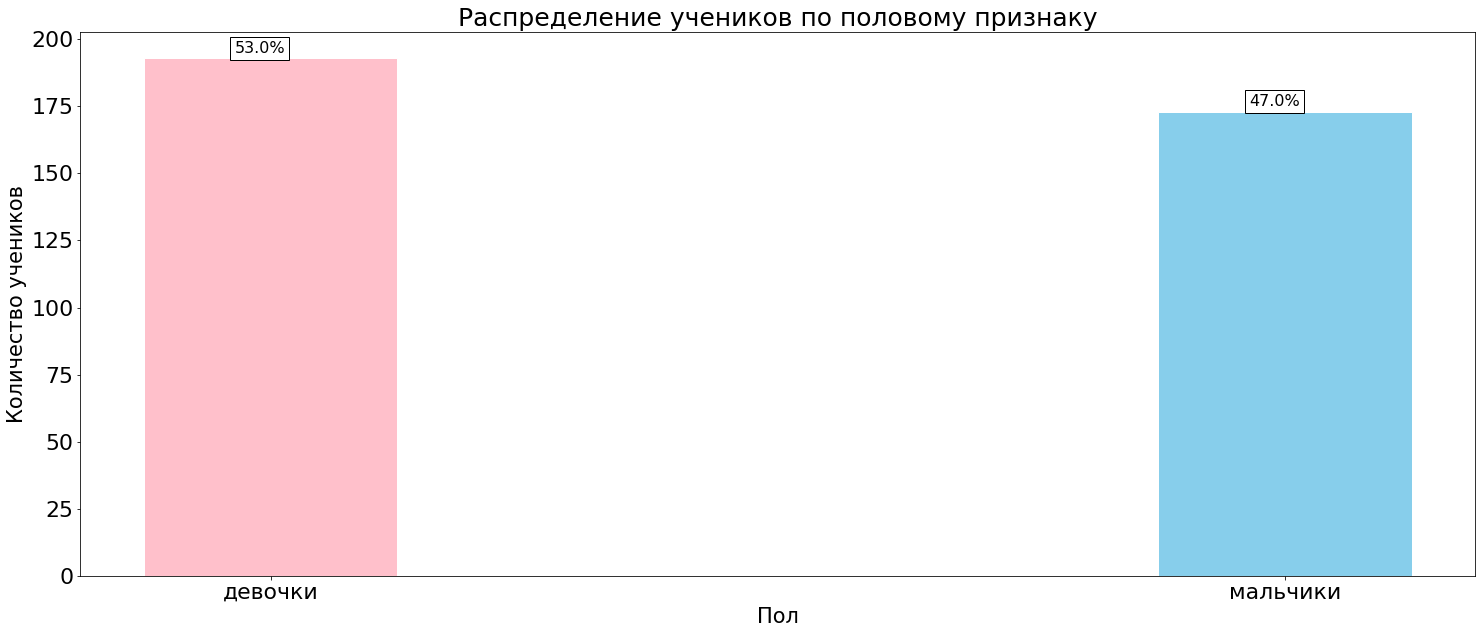

In [29]:
get_plot('sex', color_list=['pink','skyblue'],
        x_tick_labels=['девочки', 'мальчики'],
        xlabel='Пол', ylabel='Количество учеников',
        title='Распределение учеников по половому признаку', bar_width=0.25)

Количество мальчиков и девочек в данных примерно одинаковое,

52% девочек и 48% мальчиков. Вполне подходящий разброс данных, это хорошо, так как не присутствует значительный гендерный перевес
___________

-------------
Рассмотрим показатели образования отца и матери.
Лучше рассмотреть их по отдельности, работая в копии документа.
Известно, что информация об образовании некоторых родителей отсутствует, предлагаю, для дальнейшего анализа временно исключить пустые значения.
Удалять данные следует последовательно в каждом столбце, а не одновременно все, так сохранится больше значений.

В ходе написания кода выяснилось, что в одном из строк образования отца указано значение 40 в шкале от 0 - 4, 
видимо забыли поставить разделительный знак, вряд ли это выброс. Прежде, чем строить график, следует это исправить.

In [30]:
# устранение выброса в признаке образования отцов
df.iloc[11,7] = 4.0

In [31]:
df_mother = df.loc[:,'m_edu'].copy()
df_father = df.loc[:,'f_edu'].copy()

df_mother.dropna(inplace=True)
df_father.dropna(inplace=True)

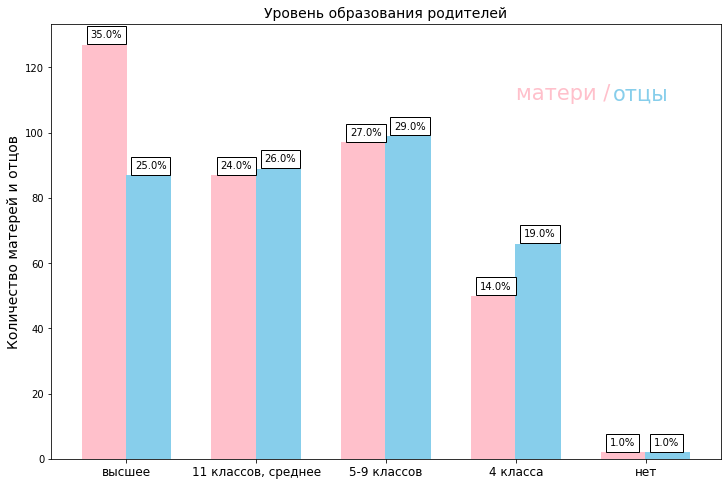

In [32]:
# Создание фигуры 
fig ,ax = plt.subplots(figsize=(12,8))


# Список для подписей отметок столбцов
edu_names = ['высшее', '11 классов, среднее' , '5-9 классов', '4 класса', 'нет']


# Создание графика
bar0 = ax.bar(np.arange(1,6)-0.17,
                     df_mother.value_counts().reset_index().sort_values(by='index', ascending=False)['m_edu']
              , width=0.35, color='pink');
bar1 = ax.bar(np.arange(1,6)+0.17,
              df_father.value_counts().reset_index().sort_values(by='index', ascending=False)['f_edu'].values,
              width=0.35, color='skyblue')


# Настройка параметров
plt.xticks(np.arange(1,6), edu_names, size=12)
ax.set_title('Уровень образования родителей', fontsize=14)
ax.set_ylabel('Количество матерей и отцов', fontsize=14)
ax.text(4,110,'матери /', color='pink', size=21)
ax.text(4.75,110,'отцы', color='skyblue', size=21)


# Вывод значений
valueprinter(bar0, xcoord=5, fontsize=10)
valueprinter(bar1, xcoord=5, fontsize=10)

В данных имелось одно искаженное значение, данный вопрос был благополучно решен.

Значения параметров образования каждого из родителей в целом  распределены без каких-либо явных недостатков. В данной выборке заметно, что более высокое образование сконцентрирована среди матерей, среди 343 отцов однако больше тех, кто отучился только 5-9 классов.
____________________

______________
Cколько времени ученики тратят на дорогу?

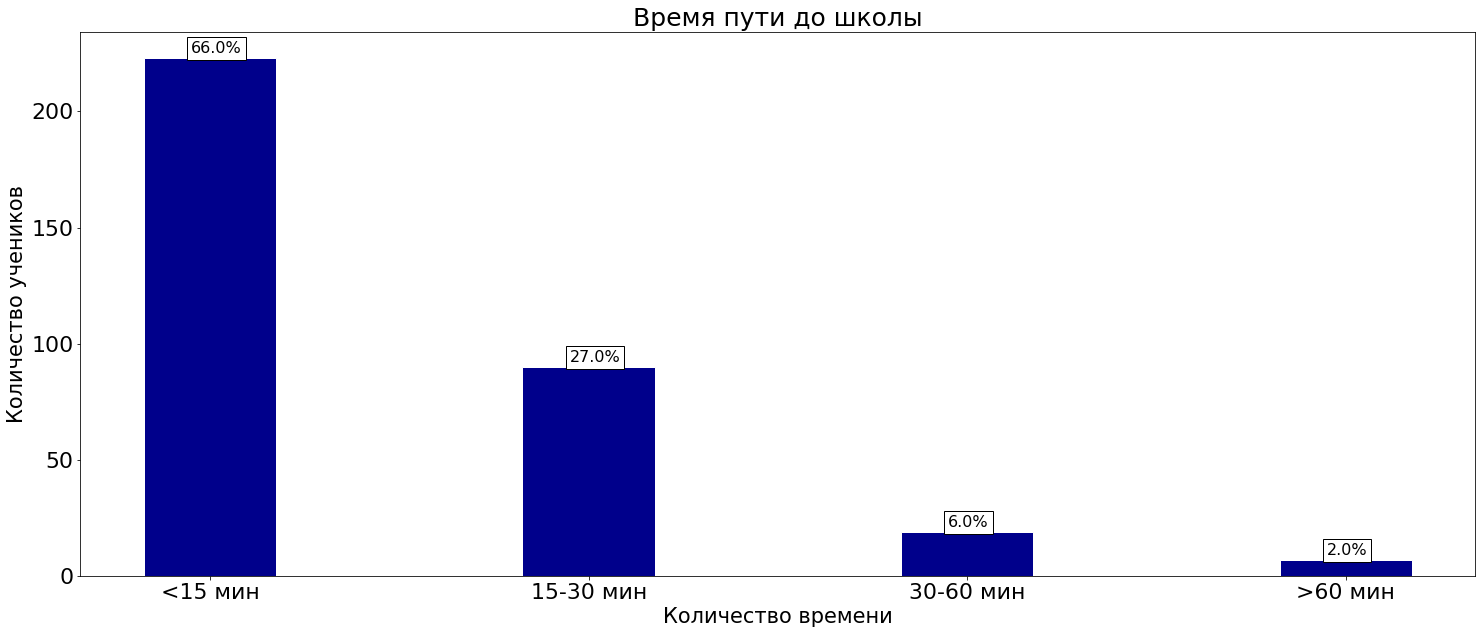

In [33]:
get_plot('traveltime', x_tick_labels=['<15 мин', '15-30 мин' ,'30-60 мин', '>60 мин'],
        xlabel='Количество времени', ylabel='Количество учеников',
        title='Время пути до школы')

Большинство учеников вероятно живет рядом со школой, ( вероятно, живет, потому что неизвестно, как ученики добираются до школы, известно лишь время пути). Абсолютное большинство тратит на дорогу до 30 минут, 65% которых добирается до школы менее, чем за 15 минут.

Аномальные значения отсутствуют, однако их отсутствие обусловлено только формой записи, на самом же деле неизвестно, сколько времени на дорогу тратят те студенты, которые добираются до школы условно больше, чем 60 минут. Однако для построения модели в данном случае это будет несущественно.
___________


_________
Cколько времени ученики тратят на учебу вне школы?

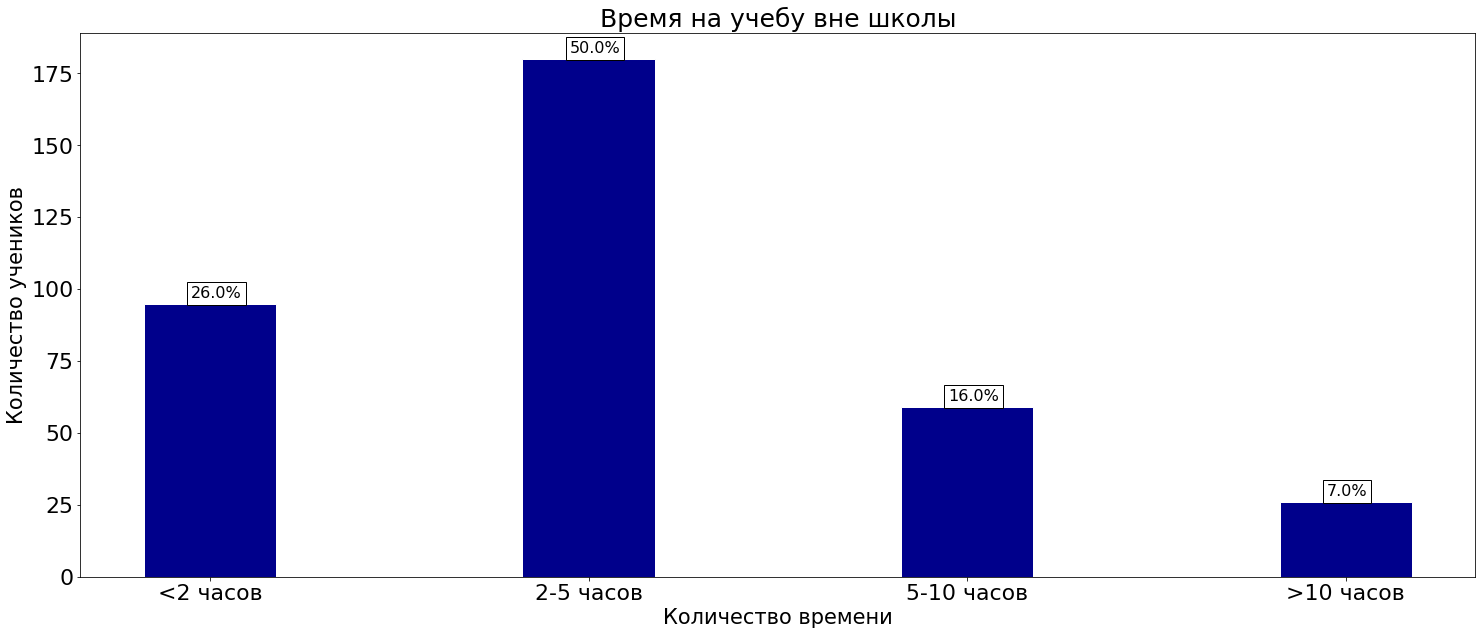

In [34]:
get_plot('studytime', x_tick_labels=['<2 часов', '2-5 часов', '5-10 часов', '>10 часов'],
        xlabel='Количество времени', ylabel='Количество учеников',
        title='Время на учебу вне школы')

В среднем ученики занимаются вне школы от 2 до 5 часов. Большая часть тратит на учебу до 5 часов свободного внешкольного времени

Аномальные значения отсутствуют.
_______________


__________

Как распределены ?

* семейные отношения
* свободное время после школы
* проведение времени с друзьями
* текущее состояние здоровья


В процессе выяснилось, что одно значение в столбце семейных отношений отрицательное, заранее следует это исправить, так как это скорее всего просто является ошибкой ввода данных.

In [35]:
df.loc[25,'famrel'] = 1

In [36]:
# необходимые значения
group = df.iloc[:,[23,24,25,26]].copy()
list(group.columns)

['famrel', 'freetime', 'go_out', 'health']

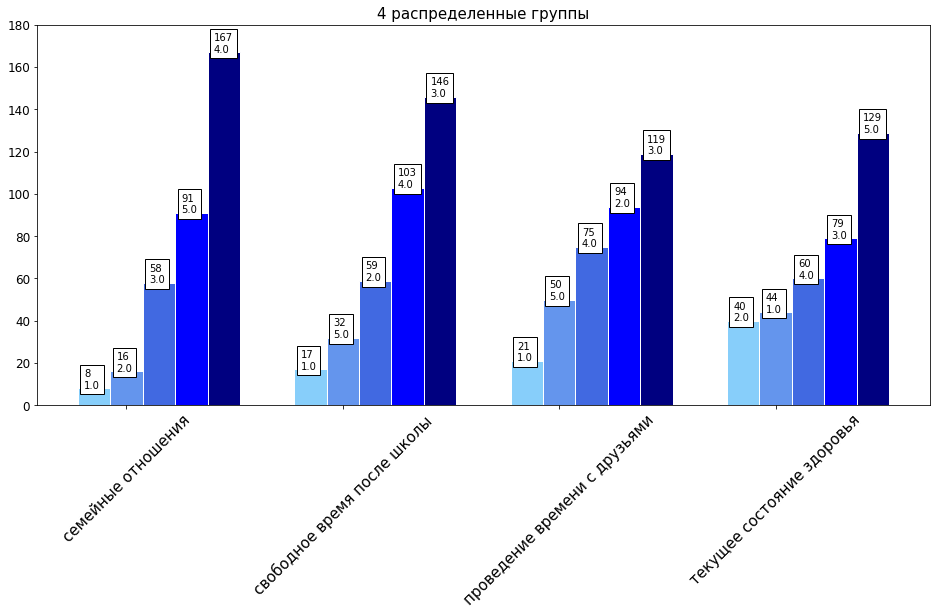

In [37]:
get_grouped_values(df, list(group.columns), label_xticks=['семейные отношения','свободное время после школы', 
                                                          'проведение времени с друзьями', 'текущее состояние здоровья'],
                   rotation=45, value_y=True,
                   color_list=['lightskyblue', 'cornflowerblue', 'royalblue', 'blue', 'navy'],
                  title='4 распределенные группы', tick_size_x=15, tick_size_y=12,
                  y_limit=True, ymax=180)


В данных имелось одно ошибочное значение, оно исправлено. 
Наглядно видно, что у большинства учеников большая половина показателей по каждому из предоставленных параметров выше среднего. У этого большинства достаточно: хорошие отношения с родителями, много свободного времени после школы и на общение с друзьями, а также хорошие показатели состояния здоровья. Видно, что те ученики, у которых состояние здоровье отличное - 5 баллов, сильно вырываются из общей массы. Видимо это те, кто дополнительно занимаются спортом. 
_____________________ 


Как ученики распределяют свое свободное время? Одни ли и те же это ученики, которые тратят много свободного время на общение с друзьями и имеют много свободного время после школы?

Как статистически связаны два этих показателя, а может даже и группы учеников?

In [38]:
leisure = df.loc[:,['freetime','go_out']]
leisure_high = leisure[(leisure['freetime'] >= 4) | (leisure['go_out'] >= 4)]
leisure_max_high = leisure[(leisure['freetime'] == 5) | (leisure['go_out'] == 5)]
    
display(leisure.corr())
display(leisure_high.corr())
display(leisure_max_high.corr())

,freetime,go_out
freetime,1.000000,0.298629
go_out,0.298629,1.000000


,freetime,go_out
freetime,1.000000,-0.257327
go_out,-0.257327,1.000000


,freetime,go_out
freetime,1.000000,-0.439715
go_out,-0.439715,1.000000


Среди данных учеников имеется не очень сильная, но статистическая взаимосвязь, указывающая на то, что в свободное время ученики предпочитают общаться с друзьями. Однако, среди тех, у кого много времени после школы, и кто часто общается с друзьями, наблюдается обратная и почти идентичная по своей величине корреляция. Более того, при увеличении времени досуга и общения с друзьями эта корреляционная связь только укрепляется, демонстрируя, что значительная часть тех, у кого много свободного времени, предпочитают тратить его не на общение с друзьями ,а на что-то иное. Предполагается, что это время используется на школьную, домашнюю подготовку.

In [39]:
leisure_learn = df.loc[:,['studytime', 'freetime']]
leisure_learn_high = leisure_learn[(leisure_learn['freetime'] >= 4) | (leisure_learn['studytime'] == 4)]
leisure_learn_max_high = leisure_learn[(leisure_learn['freetime'] == 5) | (leisure_learn['studytime'] == 4)]
    
display(leisure_learn.corr())
display(leisure_learn_high.corr())
display(leisure_learn_max_high.corr())

,studytime,freetime
studytime,1.000000,-0.111341
freetime,-0.111341,1.000000


,studytime,freetime
studytime,1.000000,-0.567682
freetime,-0.567682,1.000000


,studytime,freetime
studytime,1.000000,-0.749994
freetime,-0.749994,1.000000


Исследователь слишком хорошо думал об учениках. Видно, что статистическая связь между свободным временем и временем на домашнее задание очень небольшая, а также отрицательная. Более того, чем больше свободного времени у данных учеников, тем меньше они тратят времени на школьную подготовку. 

Вероятно, в данных такие признаки, как:
* свободное время после школы
* проведение времени с друзьями
* время на учёбу помимо школы в неделю

распределены таким образом, что высокие показатели каждого из вышеописанных характеристик, в большей степени, затрагивают разных учеников, а не одних и тех же. То есть, чаще всего, ученик тратит большее количество своего внешкольного времени либо на учебу вне школы, либо на общение с друзьями, либо на другой досуг.

___________________
Как распределено количество внеучебных неудач?

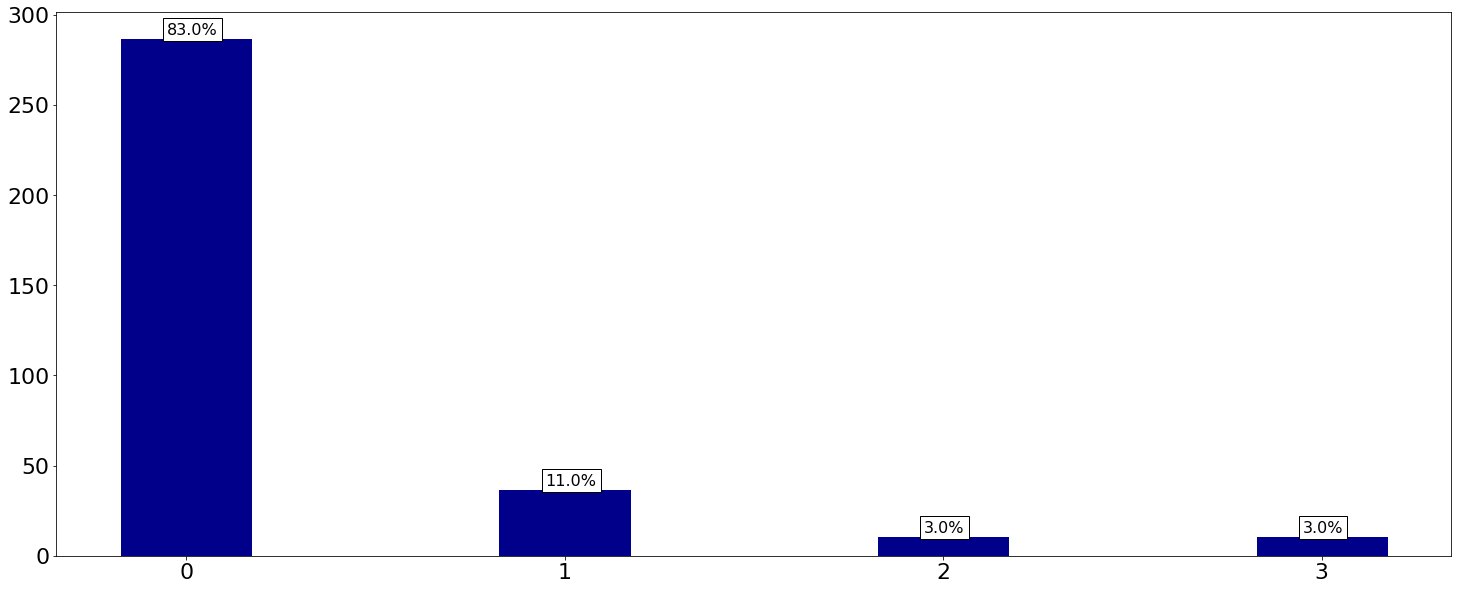

In [40]:
get_plot('failures')

Данные в приемлемом состоянии, однако важно учесть, что предоставленный признак имел недостаточное описание, в связи с чем ,непонятно о каких именно неудачах идет речь. Несмотря на это, статистический анализ наглядно демонстрирует, что у абсолютного большинства (83%) отсутствуют эти самые внеучебные неудачи. 
__________


____________
Сколько занятий ученики пропустили?

74     55.0
183    40.0
222    85.0
276    45.0
Name: score, dtype: float64

Количество пустых значений: 11


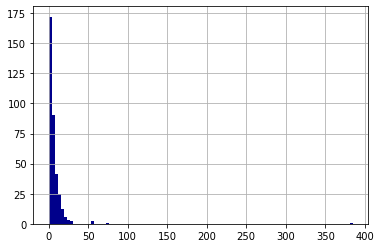

In [41]:
df['absences'].hist(bins=100, color='darkblue')

display(df[df['absences'] > 50].iloc[:,28])

# Взглянем подробнее
print('Количество пустых значений: {}'.format(df['absences'].isna().sum()))

В датафрейме наибольшее количество сконцентрировано в диапазоне от 0 - 25 , имеются 'особо удаленные' и однозначный выброс. 
Полагаю, что ученик, который отсутствовал 385 занятий либо вообще не ходил, либо числился заочно. Возможно, был на домашнем обучении.
Чтобы не терять остальные параметры в наблюдении, предлагаю изменить это значение на 38. Изменение одного значения не сыграет никакой роли в дальнейшем анализе и построении модели.


In [42]:
df.loc[222,'absences'] = 38

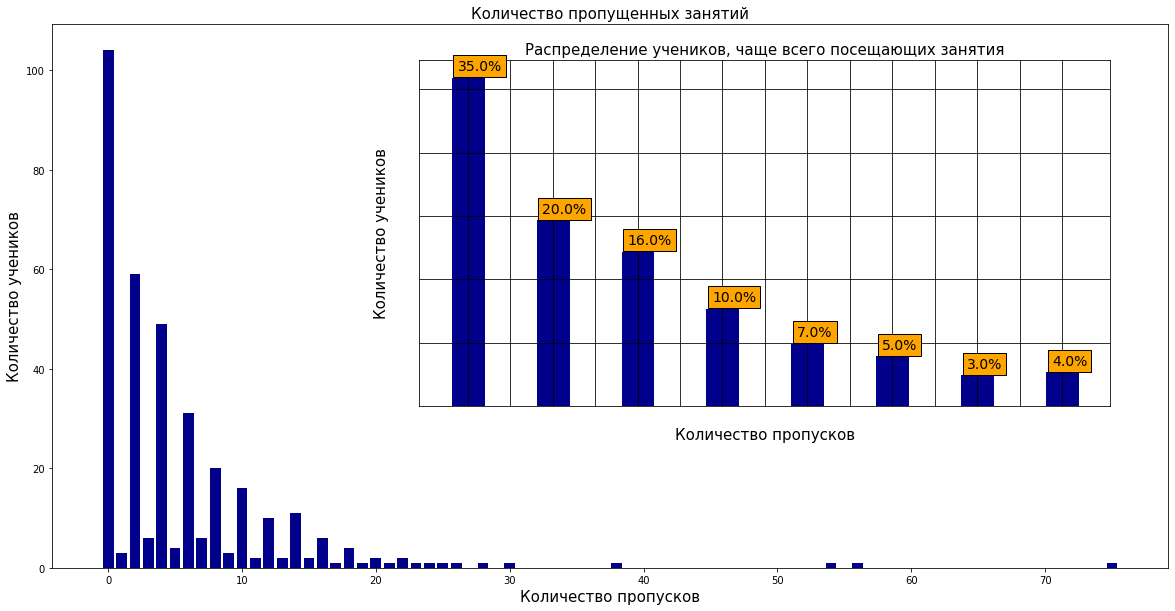

In [43]:
df_walker = df['absences'].copy()


# Создание фигуры
fig, ax = plt.subplots(figsize=(20,10))


# Создание графика
main_bar = ax.bar(df_walker.value_counts().reset_index()['index'],
                  df_walker.value_counts().reset_index()['absences'],color='darkblue')


# Настройка параметров
ax.set_xlabel('Количество пропусков',fontsize=15)
ax.set_ylabel('Количество учеников',fontsize=15)
#ax.set_facecolor('black')
ax.set_title('Количество пропущенных занятий',size=15)


# Вывод на экран значений каждого из баров
#valueprinter(main_bar,xcoord=7,fontsize=10)
#for i in range(0,8):
#    main_bar[i].set_color('orange')

    
    
# ***Создание дополнительного графика***


# Создание фигуры
insert_axes = fig.add_axes([0.38, 0.35, 0.48, 0.48])


# Создание графика
additional_bar = insert_axes.bar(df_walker.value_counts().reset_index()['index'].head(8),
                df_walker.value_counts().reset_index()['absences'].head(8),color='darkblue',edgecolor='white',
               align='center')


# Настройка параметров
insert_axes.tick_params(axis='both', colors='white')
insert_axes.set_xticks(np.arange(0,15,step=1))
insert_axes.set_xticklabels([0,'',1,'',3,'',4,'',5,'',6,'',7,'',8])
insert_axes.set_title('Распределение учеников, чаще всего посещающих занятия', fontsize=15)
insert_axes.set_xlabel('Количество пропусков',fontsize=15)
insert_axes.set_ylabel('Количество учеников',fontsize=15)
insert_axes.grid(color='black')


# Вывод на экран значений каждого из баров
valueprinter(additional_bar,xcoord=5,bbox_color='orange')



# Описание
#print('Распределение среди всех учеников')
#display(df_walker.describe())
#print('\n')
#print('Распределение среди 8ми наиболее посещающих занятия')
#display(df_walker.value_counts().reset_index()['index'].head(8).describe())
#print('Признак ({})'.format('absences')) # название признака
#print('Общее количество наблюдений: {}'.format(df['absences'].value_counts().sum()))  
#print('Количество уникальных значений: {}'.format(df['absences'].nunique())) 
#print('Количество отсутствующих значений: {}, {:.0f}%'.format(df['absences'].isna().sum(),
#                                                    round((df['absences'].isna().sum()/df['absences'].value_counts().sum()),
#                                                                        2)*100),'\n')     

В процессе была выявлена однозначная аномалия , где у ученика было 385 пропусков. 
4 ученика, которые имеют от 35-75 пропусков занятий может и являются аномалией, только вряд ли количественной. 
Ученики, которые редко посещают школы существуют во многих классах, в жизни это совершенно не является аномалией, а скорее существующим порядком вещей. Этих 4-ёх учеников, вырывающихся из общего контекста, можно оставить. Их наличие вряд ли повлияет на дальнейший анализ с учетом того, что их количество составляет около 1% от всего набора наблюдений. Конечно, их можно и удалить, однако оправдано ли это? Любопытно взглянуть на их оценки ( чуть ниже отображен датафрейм ).


In [44]:
df.loc[:,['absences','score']].query('absences > 34')

,absences,score
74,54.0,55.0
183,56.0,40.0
222,38.0,85.0
276,75.0,45.0


У 3 из 4 прогульщиков общий балл ниже или около среднего, что вполне кажется логичным. Здесь не наблюдается никаких аномалий, кроме 85 баллов у номера 222. Возможно, это ученик, который учится на дому или по еще каким-то причинам не посещал школу. В любом случае 4 человека ни на что кардинально не повлияют в данном случае. Данные остаются без дополнительных измени, помимо учтенных раннее.

________________

__________________
Как распределены оценки по экзамену среди участников? 

Количество пустых значений: 3
Количество 0 оценок: 32


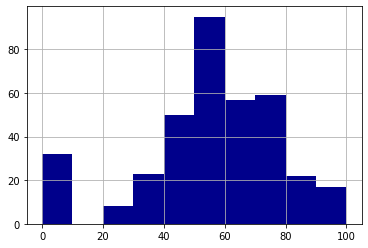

In [45]:
df['score'].hist(color='darkblue')
df['score'].describe()

print('Количество пустых значений: {}'.format(df['score'].isna().sum()))
print('Количество 0 оценок: {}'.format(len(df[df['score'] == 0 ])))

# В датафрейме имеются те ученики, которые получили 0 оценки, видимо это те, кто не экзамен вовсе

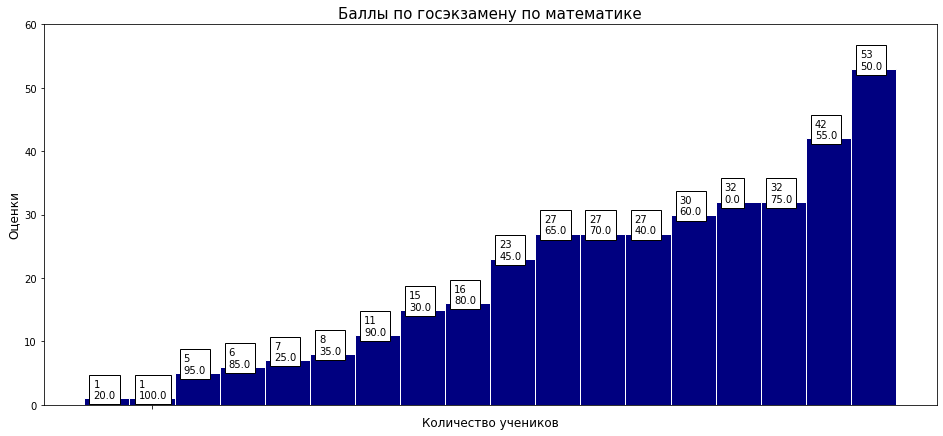

In [46]:
get_grouped_values(df, ['score'], label_xticks='', color_list=['navy']*18,
                   title='Баллы по госэкзамену по математике',
                   xlabel='Количество учеников',
                ylabel='Оценки',
                  value_y=True, y_limit=True, ymax=60)

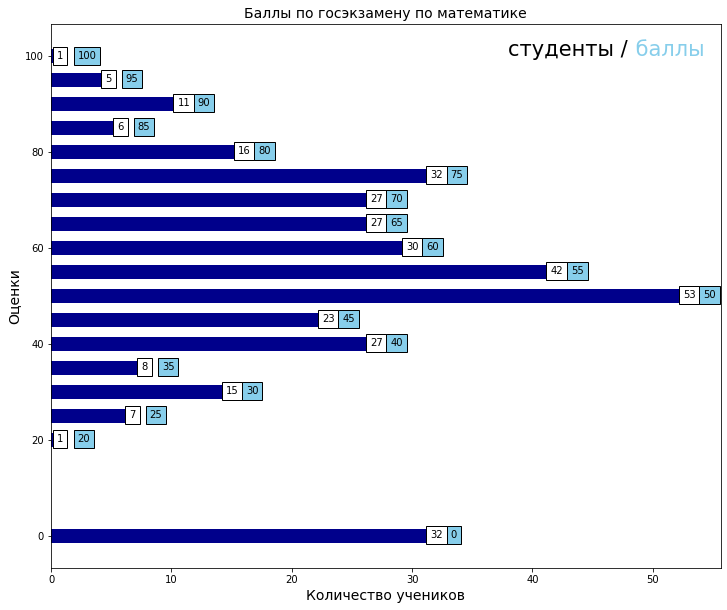

In [47]:
# Создание фигуры
fig, ax = plt.subplots(figsize=(12,10))


# Создание графикa
score_bar = ax.barh(df['score'].value_counts().index,df['score'].value_counts(),height=3,color='darkblue');


# Настройка параметров
#ax.set_facecolor('black')
ax.set_xlabel('Количество учеников',fontsize=14);
ax.set_ylabel('Оценки',fontsize=14);
labels = ['студенты','оценки']
ax.text(38,100,'студенты /',color='black',size=21)
ax.text(48,100,' баллы',color='skyblue',size=21)
ax.set_title('Баллы по госэкзамену по математике',size=14)


# Вывод значений
for elem in score_bar:
    plt.text(elem.get_x() + elem.get_width()-0.5,elem.get_y()+elem.get_height()-2,elem.get_width(),
            fontsize=10,bbox=dict(facecolor='white'))
for elem in score_bar:
    plt.text(elem.get_x() + elem.get_width()+1.2,elem.get_y()+elem.get_height()-2,int(elem.get_y()+1.5),
            fontsize=10,bbox=dict(facecolor='skyblue'))
    

# Описание
#display(df['score'].describe())
#print('Количество 0 оценок: {}'.format(len(df[df['score'] == 0 ])),'\n')
#print('Общее количество наблюдений: {}'.format(df['score'].value_counts().sum()))  
#print('Количество уникальных значений: {}'.format(df['score'].nunique())) 
#print('Количество отсутствующих значений: {}, {:.0f}%'.format(df['score'].isna().sum(),
#                                                    round((df['score'].isna().sum()/df['score'].value_counts().sum()),
#                                                                        2)*100),'\n') 
#print('Гендерное различие между учениками, сдавшими экзамен на 80 баллов и выше:')
#display(df[df['score'] > 80]['sex'].value_counts())
  

В данном признаке имеется небольшое количество студентов, которые не набрали ни одного балла ( 32 ученика получили оценку 0). Какова бы не была причина, можно считать, что эти значения не являются ошибкой, так как их достаточно много, скорее их следует относить к тому, что ученики провалили экзамен, физическое их отсутствие тоже будет являться таковым. Большинство же студентов получила оценки от 50 - 75 баллов. Учеников, набравших более 80 баллов, только 10%. 


Имеется ли гендерное различие среди отличников? ( учеников, кто набрал от 80 баллов и выше)

In [48]:
display(df.loc[df['score']>=80]['sex'].value_counts())
sex_and_score = df.loc[:,['sex','score']]
sex_and_score.loc[df['score']==100]

M    23
F    16
Name: sex, dtype: int64

,sex,score
47,M,100.0


В данном конкретном случае видно, что отличников среди мальчиков немного больше. Также, единственный, кто получил 100 баллов за экзамен - мальчик. 

## Вывод

* Как и было выявлено раньше, ни один признак не имел критического количества пустых значений. 


* В распределении учеников по их возрасту были выявлены 29 учащихся сильно старше среднего значения, данные наблюдения были устранены ради более точного анализа и построения модели, направленных на целевую группу от 15-18 лет.


* В таких параметрах как 'f_edu'(образование отца),'famsup'(образовательная поддержка семьи),'absences'(количество пропущенных занятий) имелись искажённые данные, по одному значению в каждом признаке, после их выявления они были изменены. 


* В процессе выяснилось, что количество мальчиков и девочек в данных распределено практически одинаково.
* Матери на данной выборке в среднем образованнее, чем отцы. 
* 93% учеников добирается до школы не более, чем за 30 минут. Менее, чем за 15 минут составляет путь до школы у 66% учеников. Вероятно, ученики живут в одном районе со своими школами. 
* 50% учеников тратит на учебу вне школы от 2-5 часов. 1/4 проводит за занятиями менее 2 часов, другая более 5.
* Более, чем у половины из них хорошие отношения с родителями, много свободного времени после школы, которое они видимо тратят на общение с друзьями, а также достаточно хорошие показатели состояния здоровья.
* У абсолютного большинства (83%) отсутствуют внеучебные неудачи. 
* 60% учащихся практически не пропускают занятия, у трети школьников совсем отсутствуют пропуски. 


* Рассмотрены все количественные признаки датафрейма, ни один из них не потребовал серьезных изменений.


___________________
## ***- РАЗДЕЛ 2 -***

### Задачи
- Оценить количество уникальных значений для номинативных переменных.
- Устранить выбросы.
- По необходимости преобразовать данные

Сколько уникальны значений в датафрейме с номинативными признаками? 

В датафрейме присутствует множество признаков с повторяющимся количеством уникальных значений. Больше всего, конечно, бинарных признаков (тех, у кого количество уникальных значений равняется двум).
Ради удобства имеет смысл сгруппировать похожие по структуре данные и рассматривать их совместно на отдельном графике.

Первым делом следует разобраться с бинарным большинством.

In [49]:
column_names = ['school','sex','address','p_status','famsize','schoolsup','famsup','paid','activities','nursery',
                'higher','internet','romantic']
column_names_rus = ['аббревиатура школы', 'пол ученика', 'тип адреса ученика',
                    'статус совместного жилья родителей', 'размер семьи', 'дополнительная образовательная поддержка',
                    'семейная образовательная поддержка', 'дополнительные платные занятия по математике',
                    ' дополнительные внеучебные занятия',
                    'посещал детский сад', 'хочет получить высшее образование', 'наличие интернета дома', 
                    'в романтических отношениях']

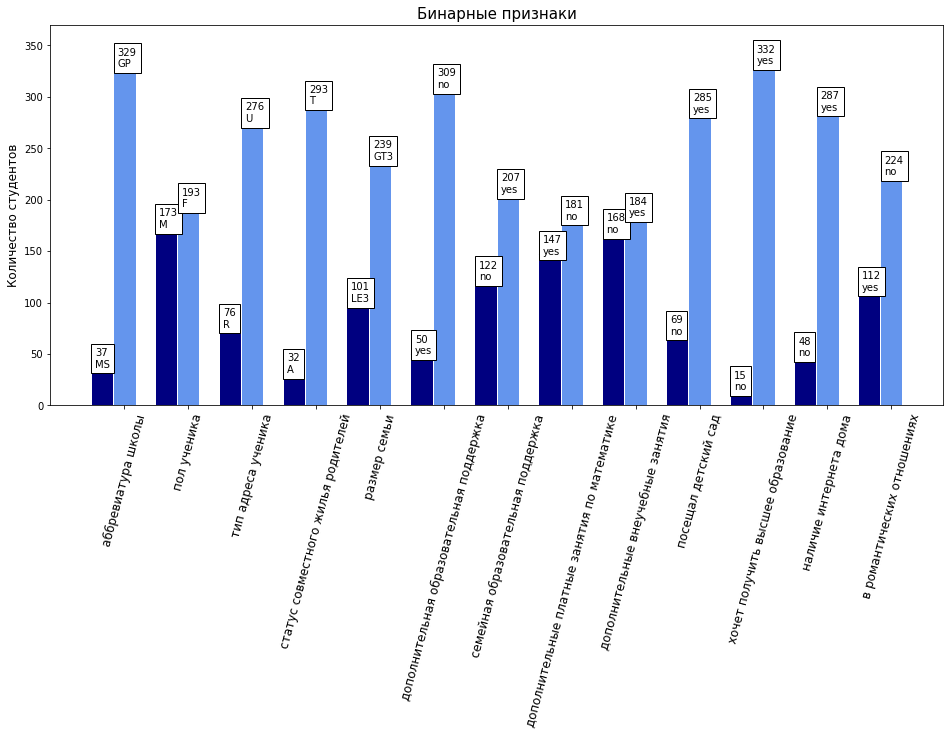

In [50]:
get_grouped_values(df, column_names, bar_width=0.35, tick_size_x=12,
                  label_xticks=column_names_rus, rotation=75, 
                   color_list=['navy', 'cornflowerblue'], value_y=True, 
                   title='Бинарные признаки', ylabel='Количество студентов',
                  y_limit=True, ymax=370)

* **пол ученика** ('F' - женский, 'M' - мужской)
* **тип адреса ученика** ('U' - городской, 'R' - за городом)
* **статус совместного жилья родителей** ('T' - живут вместе 'A' - раздельно)
* **размер семьи** ('LE3' <= 3, 'GT3' >3)

Видно, что такие признаки как пол, семейная образовательная поддержка, дополнительные платные занятия по математике и дополнительные внеучебные занятия распределены в данных достаточно сбалансированно, остальные признаки демонстрируют серьезные различия. Например:

* Данные собраны практические в одной школе (GP) 90%
* Большинство учеников живут в городе 78%
* У большинства родители живут совместно 90%
* У большинства учеников имеются братья или сестры 70%
* Практически всем ученикам не предоставляется дополнительная образовательная поддержка со стороны школы 86%
* Большинство из них посещало детский сад 81%
* Практически все ученики планируют получать высшее образование 96%
* Почти у всех имеется доступ к интернету 86%
* Многие не состоят в романтических отношениях 67%
__________________


________________
Какими профессиями заняты родители?

In [51]:
least_names = ['m_job', 'f_job', 'reason','guardian']

In [52]:
job_names = ['другое', 'гос служба', 'не работает', 'учитель', 'сфера здравоохранения']

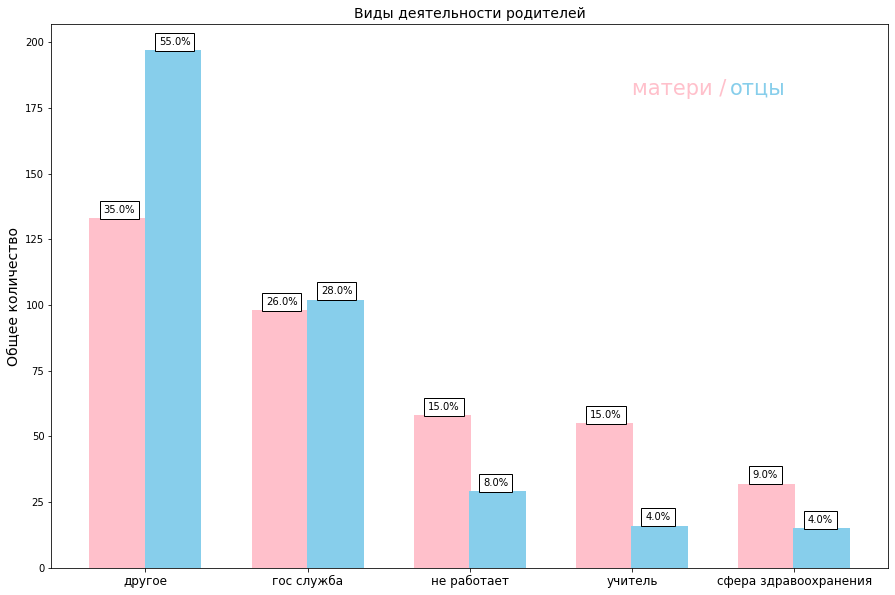

In [53]:
# Создание фигуры 
fig ,ax = plt.subplots(figsize=(15,10))


# Создание графика
bar0 = ax.bar(np.arange(1,6)-0.17,
                    df_nom['m_job'].value_counts().reset_index()['m_job'],
                    width=.35,color='pink');
bar1 = ax.bar(np.arange(1,6)+0.17,df_nom['f_job'].value_counts().reset_index()['f_job'],
           width=.35,color='skyblue');


# Настройка параметров
plt.xticks(np.arange(1,6),job_names,size=12)
#ax.set_facecolor('black')
ax.set_title('Виды деятельности родителей',fontsize=14)
ax.set_ylabel('Общее количество',fontsize=14)
ax.text(4,180,'матери /',color='pink',size=21)
ax.text(4.6,180,'отцы',color='skyblue',size=21)


# Вывод значений
valueprinter(bar0,xcoord=4,fontsize=10)
valueprinter(bar1,xcoord=4,fontsize=10)

# Описание
#journalist(['m_job','f_job'])

Любопытно, что количество матерей и отцов на государственной службе практически совпадает.
Матерей, как видно, больше в таких сферах как здравоохранение и образование, отцы в основном распределены в категории - другое.
_______________

________________
В чем причина выбора школы?


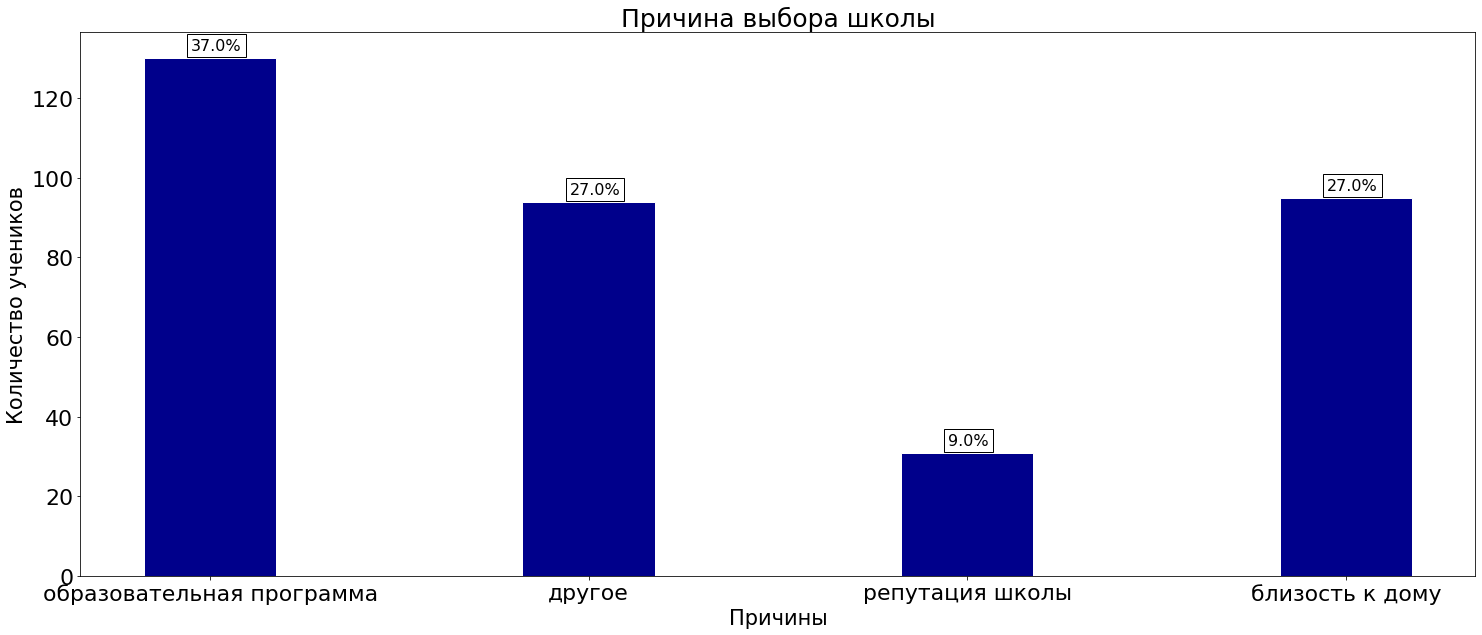

In [54]:
get_plot('reason', x_tick_labels=['образовательная программа', 'другое', 'репутация школы', 'близость к дому'],
        xlabel='Причины',
        ylabel='Количество учеников',
        title='Причина выбора школы')

___________

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

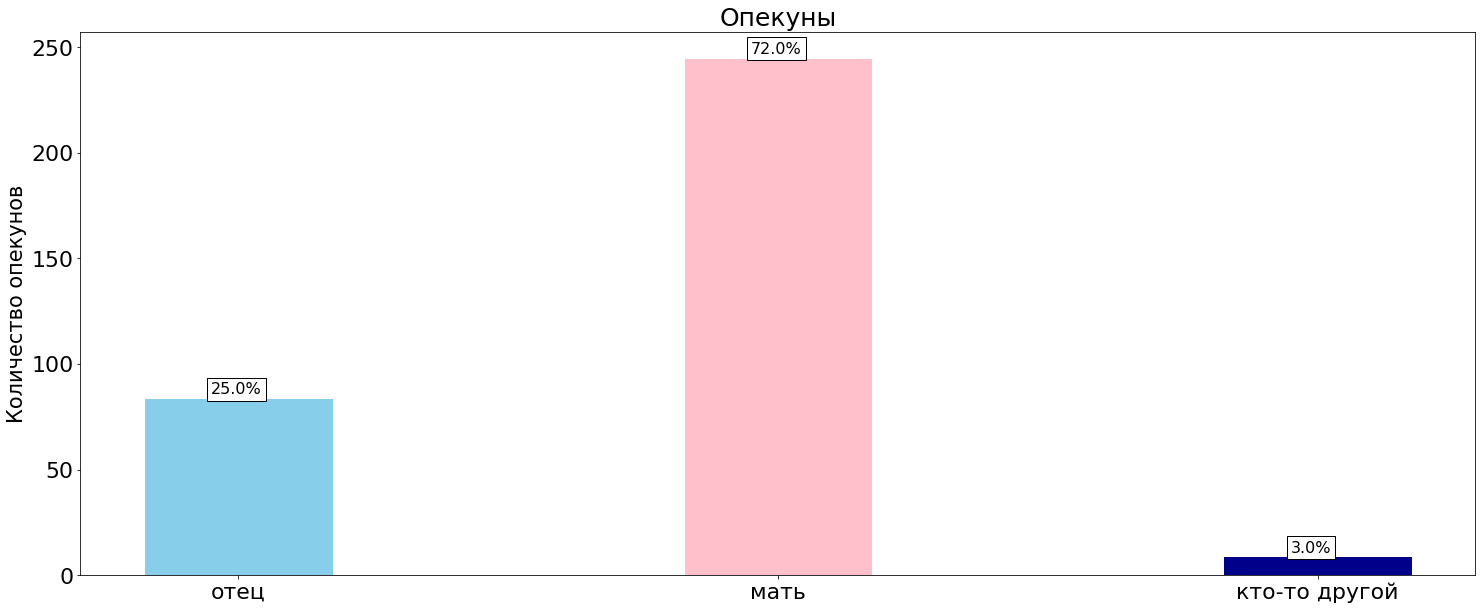

In [55]:
get_plot('guardian', color_list=['skyblue','pink'],
        x_tick_labels=['отец', 'мать','кто-то другой'],
        ylabel='Количество опекунов', title='Опекуны')

## Вывод

Предоставленные данные не потребовали серьезной обработки. 

Присутствуют пропуски, но их количество, не превыщающее 10% от общей выборки , как было сказано неоднократно, не является критическим для дальнейшего анализа. 
Однако есть исключения, также не несущие никакой опасности: 
* *оплата дополнительных занятий (paid)* - 12%
* *семейная образовательная поддержка (famsup)* - 11%
* *совместное проживание родителей (Pstatus)* - 13%

В процессе выяснился общий портрет ученика:

* В основном, дети посещают школу (GP) 90%
* Большинство учеников живут в городе 78%
* У большинства родители живут совместно 90%
* У большинства учеников имеются братья или сестры 70%
* Практически всем ученикам не предоставляется дополнительная образовательная поддержка со стороны школы 86%
* Большинство из них посещало детский сад 81%
* Практически все ученики планируют получать высшее образование 96%
* Почти у всех имеется доступ к интернету 86%
* Многие не состоят в романтических отношениях 67%
* За данными детьми в основном присматривают матери 72% 
____________________

_____________________________
## ***- Раздел 3 -***

### Задачи

* Провести корреляционный анализ количественных переменных
* Отобрать коррелирующие переменные.
* Проанализировать номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в данном случае — на переменную score).

Как количественные признаки коррелируют со шкалой оценок? Какие признаки стоит оставить для дальнейшего построения модели?

In [56]:
corr_df = df_num.corr()
score_corr = corr_df.loc[['score'],:'absences']
score_corr

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,go_out,health,absences
score,-0.155726,0.213349,0.078573,-0.070559,0.115741,-0.344338,0.057112,0.019026,-0.129685,-0.07046,0.065283


*Допущение №1.*
* Пусть, если в корреляционной оценке десятичное значение будет отлично от нуля, будем считать, что имеется взаимосвязь между параметрами, хоть и слабая

*Допущение №2.*
* Те параметры, которые меньше 10%, можно не учитывать, так как статистическая взаимосвязь слишком мала 


Из представленных параметров можно оставить только те, которые превышают 10%, остальные корреляционные результаты можно не рассматривать

Коррелирующие с оценками признаки:  

* Возраст ученика (age)
* Образование матери (m_edu)
* Количество неуспехов вне школьной деятельности (failures)
* Количество внеучебных занятий  (studytime)
* Количество времени, затрачиваемого на общение с друзьями (go_out)


In [57]:
round(score_corr.loc[:,['age','m_edu','studytime','failures','go_out']],3)

,age,m_edu,studytime,failures,go_out
score,-0.156,0.213,0.116,-0.344,-0.13


_______________
##### Дополнительные корреляционные связи

Данные пункт представляют собой интерес со стороны исследователя, к поставленной, раннее выполненной задаче, они не относятся.

In [58]:
#corr_df[corr_df > 0.10]

### признак 1 - корреляция - признак 2

* возраст (age) - **0.228** - количество внеучебных неудач (failures)

* возраст (age) - **0.135** - количество времени, проведенного с друзьями (go_out)

* образование матери (m_edu) - **0.275** - обраование отца (f_edu)

* количество внеучебных неудач (failures) - **0.120** - количество времени, проведенного с друзьями (go_out)

* отношение с родителями (famrel) - **0.175** - свободное время после школы (freetime)

* свободное время после школы (freetime) - **0.296** - количество времени, проведенного с друзьями (go_out)
___________


________________


______________________

Какие номинативные параметры влияют на оценки учеников?

In [59]:
# Создание листа со всеми названиями номинативного датафрейма ( помимо колонки с оценками)
columns_nom = list(df_nom.columns)[:-1]

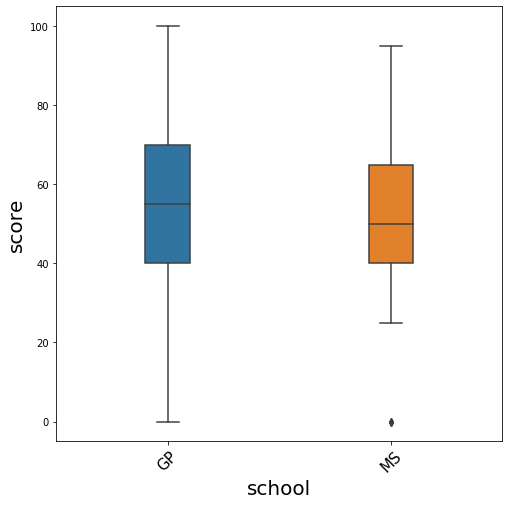

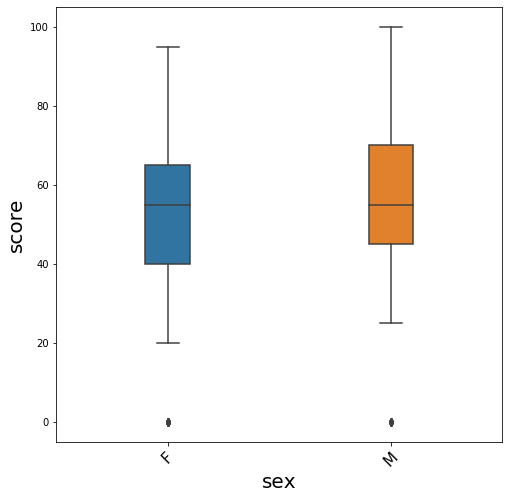

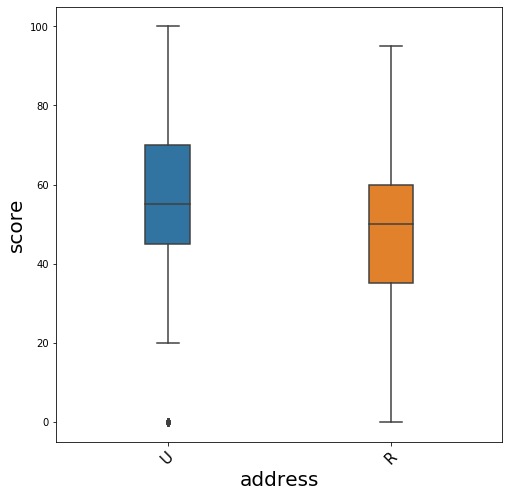

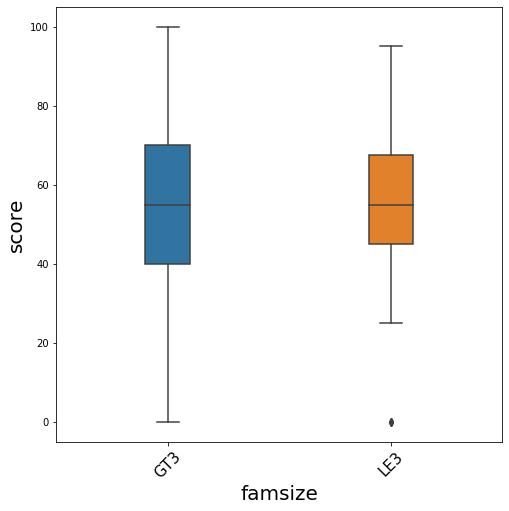

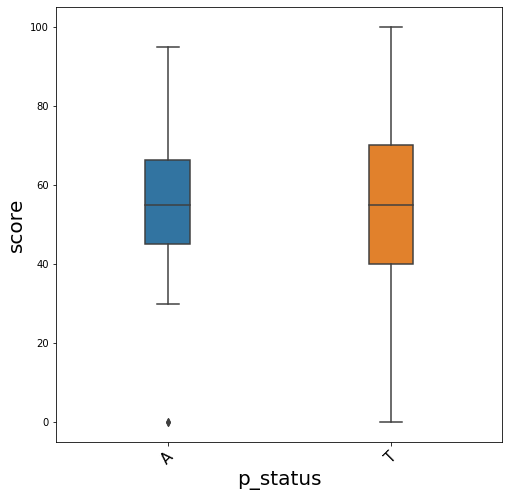

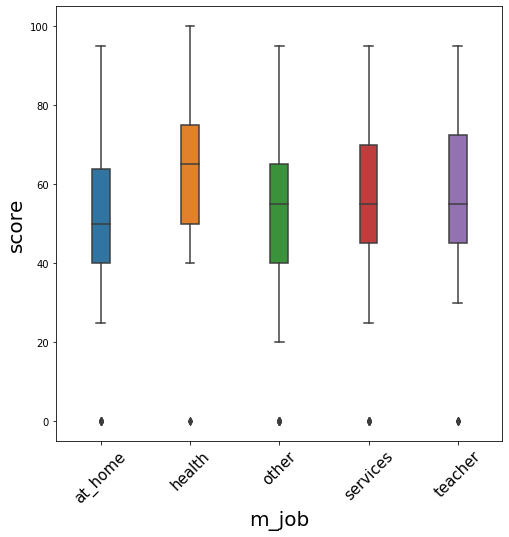

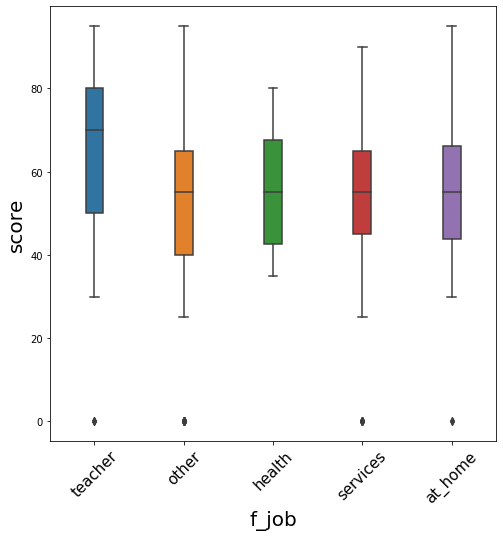

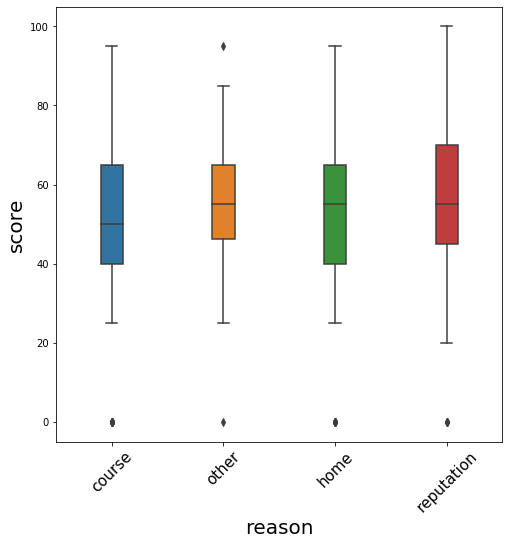

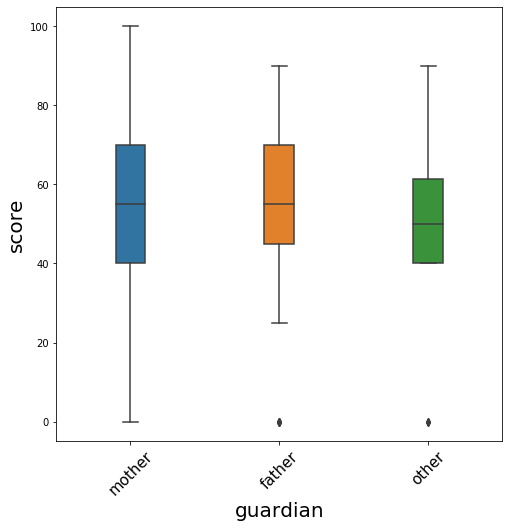

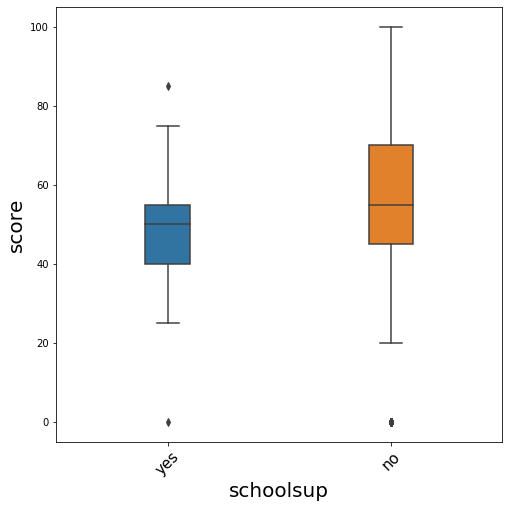

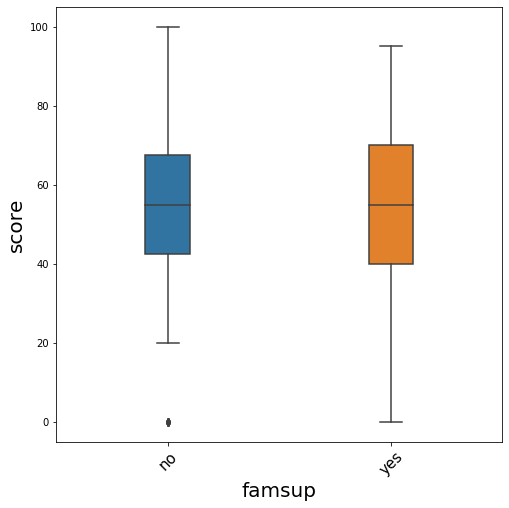

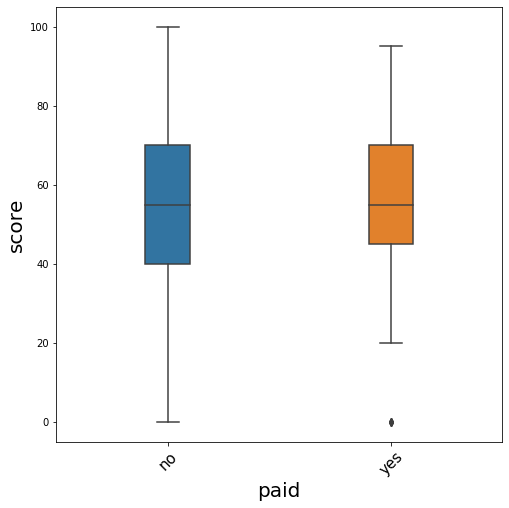

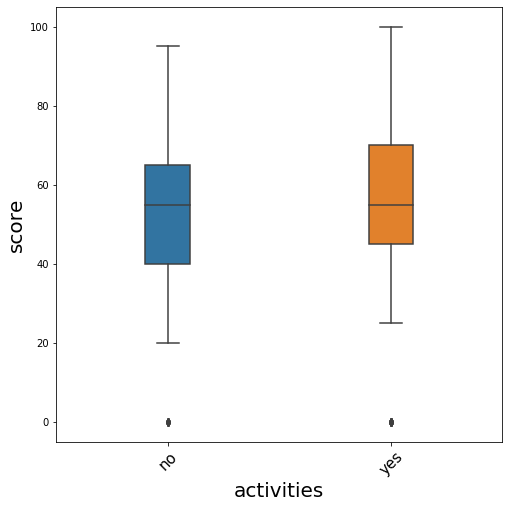

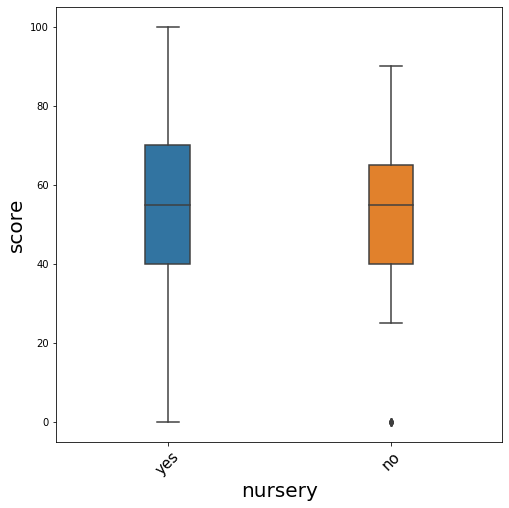

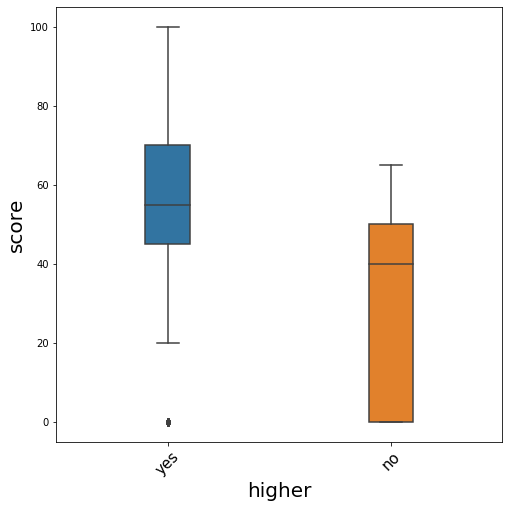

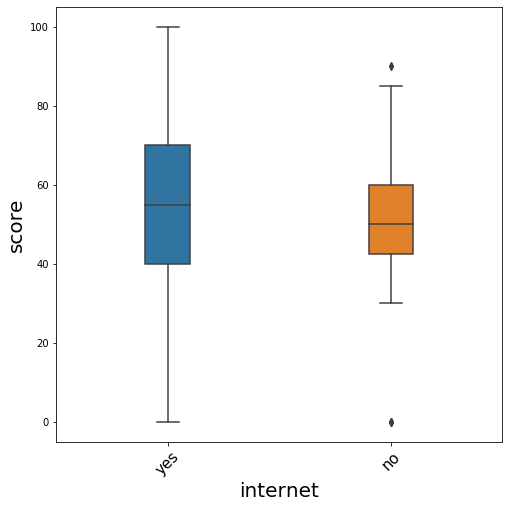

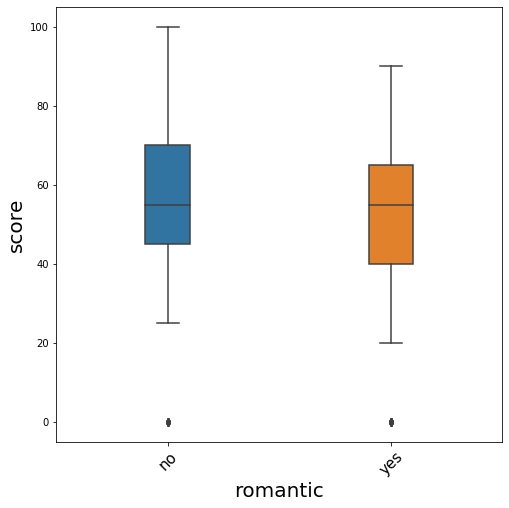

In [60]:
for i in columns_nom:
    get_boxplot(i)

Исходя из результат вышеуказанных графиков можно отметить, что хоть в среднем каждый параметр показывает примерно одинаковые результаты, есть некоторые характерные особенности, такие как: 

* Видно, что мальчики данных школ демонстрируют результаты немного лучше, чем девочки. Оценки мальчиков-отличников выше, чем у девочек отличниц. Большее количество результатов среди мальчиков тяготеет к оценкам выше среднего, когда у девочек, обратная ситуация.
* Такое же соотношение между данными имеется и в признаке места проживания, городские ученики показывают результаты немного лучше, чем те, кто живет за городом.
* Видно, что ученики, чьи матери работают в сфере здравоохранения показывают средние и максимальные результаты выше, чем у учеников, чьи матери владеют иными специальностями
* Аналогичная ситуация обстоит и с учениками, чьи отцы работают в образовательной сфере.
* Видно, что если школа не дает дополнительной поддержки учащемуся, то он сдает экзамен гораздо выше тех, кому эта помощь предоставляется.
* Однозначно видно, что те ученики, которые желают продолжить свое образование и поступать в институт имеют несравнимо лучшие показатели оценок. Средняя оценка тех, кто хочет учиться в институте примерно такая же, какой является максимальная среди тех, кто продолжать учебу не планирует.
* Также есть незначительное отличие среди тех, кто находится в романтических отношениях, и кто в них не состоит. Оценки учеников, которые не состоят в отношениях достигают более высоких баллов и в большей части таких учеников свойственно получать более высокие оценки, чем тем, кто состоит в отношениях.

Исходя из вышеописанных наблюдений, для дальнейшего построения модели следует обратить внимание на следующие признаки:

* пол (sex)
* адрес (address)
* образование матери (m_job)
* образование отцов (f_job)
* желание продолжать учебу и поступать в институт (higher)
* состояние в романтических отношениях (romantic)

а также 

* дополнительные платные занятия по математике (paid)

Необычным, кажется, отсутствие значительных различий между результатами тех, у кого имелись дополнительные занятия по математике и теми, у кого они отсутствовали. Предполагается, что те, кто получают дополнительные занятия, смогли благодаря этому вывести свои оценки на тот же уровень, что и те, кому дополнительная помощь не требуется. В связи с этим встает вопрос, что если бы в данных имелась возможность сравнения результатов тех учеников, которым необходимы дополнительные занятия, до и после их проведения? Вполне вероятно, что можно было бы увидеть определенную тенденцию к улучшению результатов экзамена, что в свое очередь демонстрировало бы наличие связи между данными двумя признаками (дополнительные занятия и результаты экзамена). Однозначно утверждать на данный момент то, что этот показатель не имеет влияния нельзя. Проверить данную гипотезу с учетом текущих данных не представляется возможным. Исследователем однако рекомендуется использовать данный признак для дальнейшего построения модели.

____________________
Какие результаты покажет такой инструмент, как тест Стьюдента, в поиске различия в распределении оценок по номинативным признакам?

In [61]:
all_names = list(df_nom.columns[:-1])+list(df_num.columns[:-1])

In [62]:
for name in all_names:
    get_stat_dif(name)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки go_out
Найдены статистически значимые различия для колонки absences


В самом начале работы в данных о возрасте имелось 29 учеников, чей возраст превышает 18 лет.
Тест-Стьюдента был заранее проведен дважды, на данных с учетом этих 29 человек и на данных без их вовлечения в анализ. 
Результаты (приведенные ниже) показывают, что как при наличии, так и исключении возрастной аномалии, параметр возраста не рассматривается тестом как значимый, даже при учете корреляции, которая, в том числе является очень низкой. Также , если обратить внимание, возникает дополнительный параметр - пол ученика, который раньше оставался бы незамеченным с учетом особенностей работы функции. На графике (боксплот) четко видно небольшое различие показателей в обоих случаях.

**Данные учеников от 15 - 18 лет**

*Найдены статистически значимые различия для колонки sex*

Найдены статистически значимые различия для колонки address

Найдены статистически значимые различия для колонки m_job

Найдены статистически значимые различия для колонки higher

Найдены статистически значимые различия для колонки romantic

Найдены статистически значимые различия для колонки m_edu

Найдены статистически значимые различия для колонки failures

Найдены статистически значимые различия для колонки go_out

Найдены статистически значимые различия для колонки absences

**Данные учеников от 15 - 18 лет, включая 29 взрослых школьников**


Найдены статистически значимые различия для колонки address

Найдены статистически значимые различия для колонки m_job

Найдены статистически значимые различия для колонки higher

Найдены статистически значимые различия для колонки romantic

Найдены статистически значимые различия для колонки m_edu

Найдены статистически значимые различия для колонки failures

Найдены статистически значимые различия для колонки go_out

Найдены статистически значимые различия для колонки absences
__________________________________


_________________________
## Вывод

**Какие признаки учитывать для построения дальнейшей модели?**

С учетом полученных результатов различных статистических методов работы, предлагается выделить следующие **показатели** 

* *пол (sex)*
* *адрес (address)*
* *образование отцов (f_job)*
* *желание продолжать учебу и поступать в институт (higher)*
* *состояние в романтических отношениях (romantic)*
* *образование матери (m_edu)*
* *количество внеучебных неудач (failures)*
* *количество времени, затрачимаевого на общение с друзьями (go_out)*
* количество пропущенных занятий (absences)
* количество внеучебных занятий (studytime)
* дополнительные платные занятия по математике (paid)

*Замечание*

Однако, хоть признаки отсутствия учеников на занятиях (absences) и наличие дополнительных платных занятий (paid) демонстрируют очень низкую корреляционную связь с оценками в корреляционной матрице, а тест Стьюдента вовсе не показал параметр количества времени, затрачиваемого на учебу вне школы (studytime), автором исследования рекомендуется оставить эти признаки для дальнейшего построения модели. Также, не менее разумным будет исключение возрастного признака (age). Его незначимость в том числе подтверждает и тест-Стьюдента.


___________________________
# Этап 3 
_______________

## Баг-репорт

Данные поступили в практически в отличном виде. Имеется лишь достаточно незначительное количество пустых значений в 27 признаках. Их распределение по датафрейму достаточно широкое, что не позволяло устранить их одновременно. Был обнаружен признак, который не учитывался в изначальном описании данных 'studytime,granular', в последствии был полностью устранен.

Иных проблем не обнаружено.
___________



-------
## *Результат выполненной работы*


Следует отметить, что большинство наблюдений взято из одной школы, для такой небольшой выборки в 400 человек это вероятно даже лучше, чем если бы эти данные были получены из десятка разных школ. Полагаю, что различия между учащимися в таком случае могли бы быть куда более разрозненными. Если бы в данных были собраны 4000 учеников из разных школ, то вероятно, различия среди учеников, накладываемые самими школами, стирались бы при такой большой выборке. Почему это возможно важно? Из этого десятка школ следует и месторасположение, и район проживания, а следовательно доходы родителей, круг общения и другие параметры, влияющие на жизнь ученика. Поэтому для дальнейшего построения модели вероятно лучше, когда данные собраны из одного источника, однако это возможно тоже наложит отпечаток на работу модели, так как она будет выстроена на очень узко таргетированной группе. При всех вышеописанных условиях, данные вполне годятся для работы и построения модели. 

Данные были незначительно откорректированы в процессе исследования. 

Изменения: 
* age - устранены 29 учеников, чей возраст выше или равен 19 
* f_edu - исправлено значение одного наблюдения в признаке образования отцов
* famrel - исправлено значение одного наблюдения в признаке семейных отношений
* absences - исправлено значение одного наблюдения в признаке пропущенных занятий


Консолидируя полученные сведения в некоторый портрет ученика, в целом, можно отметить следующее. 
Возраст и пол распределены почти равнозначно среди учащихся. Также, достаточно одинаковое распределение имеет уровень образование среди родителей. Видно, что ученики в общей своей массе имеют достаточно неплохие условия и показатели успешной учебы, большинство из них имеет оценки по математике выше среднего. Ученики тратят достаточно времени на дополнительное образование, на уроки вне школы (по нескольку часов), имеют хорошее отношение с родителями, доступ к интернету, дальнейшее желание учиться и поступать в университет, в принципе редко пропускают школьные занятия и живут рядом со школой в городской местности. У большинства из них родители живут совместно, имеются братья и сестры. Большая их часть посещала детский сад. Чуть более половины учащихся состоят в романтических отношениях.


В процессе корреляционного анализа и теста Стьюдента были отмечены параметры, которые могут иметь влияние на результаты сдачи экзамена по математике.
* пол **(sex)**
* адрес **(address)**
* образование отцов **(f_job)**
* желание продолжать учебу и поступать в институт **(higher)**
* состояние в романтических отношениях **(romantic)**
* образование матери **(m_edu)**
* количество внеучебных неудач **(failures)**
* количество времени, затрачиваемого на общение с друзьями **(go_out)**
* количество пропущенных занятий **(absences)**
* количество внеучебных занятий **(studytime)**
* дополнительные платные занятия по математике **(paid)**


Конечно, известно, что количество пропущенных занятий (absences), желание дальнейшего обучения в институте (higher), количество времени, проведенного с друзьями (go_out) , количество затраченного времени на учебу (которое между прочим, статистический инструмент анализа не отметил как фактор, влияющий на результат экзамена), наличие дополнительных занятий по предмету (paid) и количество затраченного времени на подготовку к экзамену имеют прямое отношение к сдаче любого теста. Однако в данной работе не предусматривается интерпретация исследователем полученных результатов, объясняющая, имеется ли в действительности эта взаимосвязь. Достаточным будет выделение необходимых для работы признаков, что и сделано выше.

Также важно отметить специфику работы инструментов исследования ( корреляция, тест Стьюдента). При построении дальнейшей модели необходимо помнить, что указание на полученные признаки ( как бы не хотелось верить в их причинно-следственную связь или как бы она не была очевидна), демонстрирующие **влияния условий жизни на успеваемость** является весьма условным, а не однозначно установленным. Другими словами, отмеченные характеристики не претендуют на то, чтобы однозначно установить, существует ли в действительности взаимосвязь между предоставленными параметрами и оценками. В первую очередь это связано с тем, что сама корреляционная ( количественная) мера связи является незначительной в текущих данных, а во-вторых, потому что для установления **влияния условий жизни на успеваемость** недостаточно использовать только количественные инструменты анализа.

Возможно, некоторые признаки, как полученные в ходе исследования, так и те, что остались вне рассмотрения, в действительности, имеют куда большее значение на успеваемость, однако из-за способа их добычи и сбора, их не смогли отследить статистические инструменты исследования, что случается чаще, чем мы думаем. Кроме этого, сама выборка проделана на основе не всех, а конкретных учеников, конкретной школы, что в свою очередь, также накладывает ряд условий.

Поскольку результат работы продемонстрировал лишь статистическую связь, то единственным критерием доказательства их реального влияния будет успешное построение и не менее успешное применение модели. В связи с вышеизложенными допущениями, при построении модели можно учитывать то, что возможно придется добавлять какие-то неучтенные признаки или исключать имеющиеся для успешного решения поставленной задачи. Однако на данный момент предлагается использовать вышеизложенные параметры.
______________
